# Предсказание ДТП

## 0. Описание проекта

Поступил заказ: нужно создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.
Идея решения задачи от заказчика: 

1. Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties)
- Для модели выбрать тип виновника — только машина (car).
- Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
- Для моделирования ограничиться данными за 2012 год — они самые свежие.
- Обязательное условие — учесть фактор возраста автомобиля.

2. На основе модели исследовать основные факторы ДТП.


3. Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
- Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
- Какие ещё факторы нужно учесть?
- Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

Заказчик предлагает вам поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы. 

### 0.1 Краткое описание таблиц

- collisions — общая информация о ДТП
Имеет уникальный case_id. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и когда.

- parties — информация об участниках ДТП
Имеет неуникальный case_id, который сопоставляется с соответствующим ДТП в таблице collisions. Каждая строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице должно быть две строки с совпадением case_id. Если нужен уникальный идентификатор, это case_id and party_number.

- vehicles — информация о пострадавших машинах
Имеет неуникальные case_id и неуникальные party_number, которые сопоставляются с таблицей collisions и таблицей parties. Если нужен уникальный идентификатор, это case_id and party_number.

**collisions (информация о происшествиях)**

CASE_ID Идентификационный Номер в базе данных 
- Уникальный номер для зарегистрированного происшествия в таблице происшествий.

COLLISION_DATE Дата происшествия 
- Формат год/месяц/день

COLLISION_TIME Время происшествия 
- Формат: 24-часовой

INTERSECTION Является ли место происшествия перекрёстком 
- Y — Intersection (перекрёсток)
- N — Not Intersection (не перекрёсток)
- Not stated (Не указано)

WEATHER_1 Погода
- A — Clear (Ясно)
- B — Cloudy (Облачно)
- D — Snowing (Снегопад)
- E — Fog (Туман)
- F — Other (Другое)
- G — Wind (Ветер)
- Not Stated (Не указано)

COLLISION_DAMAGE Серьёзность происшествия
- 1 — FATAL ТС (Не подлежит восстановлению)
- 2 — SEVERE DAMAGE (Серьёзный ремонт, большая часть под замену/Серьёзное повреждение капитального строения)
- 3 — MIDDLE DAMAGE (Средний ремонт, машина в целом на ходу/Строение в целом устояло)
- 4 — SMALL DAMAGE (Отдельный элемент кузова под замену/покраску)
- 0 – SCRATCH (Царапина)

PRIMARY_COLL_FACTOR Основной фактор аварии
- A — Code Violation (Нарушение правил ПДД)
- B — Other Improper Driving (Другое неправильное вождение)
- C — Other Than Driver (Кроме водителя)
- D — Unknown (Неизвестно)
- E — Fell Asleep (Заснул)
- Not Stated (Не указано)

ROAD_SURFACE Состояние дороги
- A — Dry (Сухая)
- B — Wet (Мокрая)
- C — Snowy or Icy (Заснеженная или обледенелая)
- D — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.)
- Not Stated (Не указано)

LIGHTING Освещение
- A — Daylight (Дневной свет)
- B — Dusk-Dawn (Сумерки-Рассвет)
- C — Dark-Street Lights (Темно-Уличные фонари)
- D — Dark-No Street Lights (Темно-Нет уличных фонарей)
- E — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают)
- Not Stated (Не указано)

COUNTY_CITY_LOCATION Номер географических районов, где произошло ДТП
- число

COUNTY_LOCATION	Названия географических районов, где произошло ДТП
- список разных названий, категориальный тип данных

DIRECTION - Направление движения
- N — North (Север)
- E — East (Восток)
- S — South (Юг)
- W — West (Запад)
- or blank — Not State (Не указано)
- на перекрёстке

DISTANCE Расстояние от главной дороги (метры)
- число

LOCATION_TYPE Тип дороги
- H — Highway (Шоссе)
- I — Intersection (Перекрёсток)
- R — Ramp (or Collector) (Рампа)
- or blank — Not State Highway (Не указано)

PARTY_COUNT Количество участников
- число

PCF_VIOLATION_CATEGORY Категория нарушения
- 01 — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения)
- 02 — Impeding Traffic (Препятствие движению транспорта)
- 03 — Unsafe Speed (Превышение скорости)
- 04 — Following Too Closely (Опасное сближение)
- 05 — Wrong Side of Road (Неправильная сторона дороги)
- 06 — Improper Passing (Неправильное движение)
- 07 — Unsafe Lane Change (Небезопасная смена полосы движения)
- 08 — Improper Turning (Неправильный поворот)
- 09 — Automobile Right of Way (Автомобильное право проезда)
- 10 — Pedestrian Right of Way (Пешеходное право проезда)
- 11 — Pedestrian Violation (Нарушение пешеходами)
- 12 — Traffic Signals and Signs (Дорожные сигналы и знаки)
- 13 — Hazardous Parking (Неправильная парковка)
- 14 — Lights (Освещение)
- 15 — Brakes (Тормоза)
- 16 — Other Equipment (Другое оборудование)
- 17 — Other Hazardous Violation (Другие нарушения)
- 18 — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)
- 19 — Speeding (Скорость)
- 20 — Pedestrian dui (Нарушение пешехода)
- 21 — Unsafe Starting or Backing (Опасный старт)
- 22 — Other Improper Driving (Другое неправильное вождение)
- 23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug (Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения)
- 24 — Fell Asleep (Заснул)
- 00 — Unknown (Неизвестно)
- Not Stated (Не указано)

TYPE_OF_COLLISION Тип аварии		
- A — Head-On (Лоб в лоб)
- B — Sideswipe (Сторона)
- C — Rear End (Столкновение задней частью)
- D — Broadside (Боковой удар)
- E — Hit Object (Удар объекта)
- F — Overturned (Опрокинутый)
- G — Vehicle (транспортное средство/ Пешеход)
- H — Other (Другое)
- Not Stated (Не указано)

MOTOR_VEHICLE_INVOLVED_WITH	Дополнительные участники ДТП
- Other motor vehicle (Другой автомобиль)
- Fixed object (Неподвижный объект)
- Parked motor vehicle (Припаркованный автомобиль)
- Pedestrian (Пешеход)
- Bicycle (Велосипедист)
- Non-collision (Не столкновение)
- Other object (Другой объект)
- Motor vehicle on other roadway (Автомобиль на другой проезжей)
- Animal (Животное)
- Train (Поезд)

ROAD_CONDITION_1 Дорожное состояние		
- A — Holes, Deep Ruts (Ямы, глубокая колея)
- B — Loose Material on Roadway (Сыпучий материал на проезжей части)
- C — Obstruction on Roadway (Препятствие на проезжей части)
- D — Construction or Repair Zone (Зона строительства или ремонта)
- E — Reduced Roadway Width (Уменьшенная ширина проезжей части)
- F — Flooded (Затоплено)
- G — Other (Другое)
- H — No Unusual Condition (Нет ничего необычного)
- Not Stated (Не указано)

**Parties (описание участников происшествия)**

CASE_ID Идентификационный  номер в базе данных
- Уникальный номер для зарегистрированного происшествия в таблице происшествий.

PARTY_NUMBER Номер участника происшествия
- От 1 до N — по числу участников происшествия

PARTY_TYPE Тип участника происшествия
- 1 — Car (Авто)
- 2 — Road bumper (Отбойник)
- 3 — Building (Строения)
- 4 — Road signs (Дорожные знаки)
- 5 — Other (Другое)
- 6 — Operator (Оператор)
- Not Stated (Не указано)

AT_FAULT Виновность участника	
- 0/1

INSURANCE_PREMIUM Сумма страховки (тыс. $)
- число

PARTY_DRUG_PHYSICAL Состояние участника: физическое или с учётом принятых лекарств
- E — Under Drug Influence (Под воздействием лекарств)
- F — Impairment — Physical (Ухудшение состояния)
- G — Impairment Unknown (Не известно)
- H — Not Applicable (Не оценивался)
- I — Sleepy/Fatigued (Сонный/Усталый)
- Not Stated (Не указано)

PARTY_SOBRIETY Трезвость участника
- A — Had Not Been Drinking (Не пил)
- B — Had Been Drinking, Under Influence (Был пьян, под влиянием)
- C — Had Been Drinking, Not Under Influence (Был пьян, не под влиянием)
- D — Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно)
- G — Impairment Unknown (Неизвестно ухудшение)
- H — Not Applicable (Не оценивался)
- Not Stated (Не указано)

CELLPHONE_IN_USE Наличие телефона в автомобиле (возможности разговаривать по громкой связи)
- 0/1

**Vehicles (Описание автомобиля)**

ID Индекс текущей таблицы
- Номер в таблице

CASE_ID Идентификационный номер в базе данных
- Уникальный номер для зарегистрированного происшествия в таблице происшествий.

PARTY_NUMBER Номер участника происшествия
- От 1 до N — по числу участников происшествия

VEHICLE_TYPE Тип кузова
- MINIVAN
- COUPE
- SEDAN
- HATCHBACK
- OTHER

VEHICLE_TRANSMISSION Тип КПП	
- auto (Автоматическая)
- manual (Ручная)
- Not Stated (Не указано)

VEHICLE_AGE Возраст автомобиля (в годах)
- число

### 0.2 Инструкция по выполнению проекта

1. Загрузить данные

2. Проведите первичное исследование таблиц

3. Проведите статистический анализ факторов ДТП

4. Создайте модель для оценки водительского риска

5. Найдите лучшую модель

6. Проверьте лучшую модель в работе

7. Сделайте общий вывод по модели

## 1. Загрузим данные

In [37]:
# Установим необходимые библиотеки

!pip -q install phik
!pip -q install scikit-learn
!pip -q install sqlalchemy 
!pip -q install category_encoders
!pip -q install shap


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [38]:
# Импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from catboost import CatBoostClassifier
from category_encoders import TargetEncoder

from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    make_scorer,
    recall_score,
    precision_recall_curve,
    precision_score,
    f1_score,
    roc_auc_score,
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sqlalchemy import create_engine

import phik
import shap
import warnings
import os
import requests

In [39]:
# Игрорируем предупреждения

warnings.filterwarnings("ignore", category=FutureWarning)

In [40]:
# Определим константы

RANDOM_STATE = 42
TEST_SIZE = 0.25

In [41]:
# Загрузим файлы

base_url = "https://huggingface.co/datasets/onejetpilot/collisions/resolve/main/"

files = [
    ("case_ids.csv", "case_ids.csv"),
    ("collisions.csv", "collisions.csv"),
    ("df_dtp.csv", "df_dtp.csv"),
    ("parties.csv", "parties.csv"),
    ("phone_collisions.csv", "phone_collisions.csv"),
    ("total_collisions.csv", "total_collisions.csv"),
    ("vehicle_collisions.csv", "vehicle_collisions.csv"),
    ("vehicles.csv", "vehicles.csv")
]

for filename, local_path in files:
    if not os.path.exists(local_path):
        print(f"Файл {filename} не найден — начинаю скачивание...")

        file_url = base_url + filename
        response = requests.get(file_url, stream=True)

        if response.status_code == 200:
            with open(local_path, "wb") as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)
            print(f"Файл успешно скачан: {local_path}")
        else:
            print(f"Ошибка при скачивании {filename}: {response.status_code}")
    else:
        print(f"Файл {filename} уже есть локально — загрузка пропущена")


case_ids = pd.read_csv("case_ids.csv", index_col=0)
collisions = pd.read_csv("collisions.csv", index_col=0)
df = pd.read_csv("df_dtp.csv", index_col=0)
parties = pd.read_csv("parties.csv", index_col=0)
phone_collisions = pd.read_csv("phone_collisions.csv", index_col=0)
total_collisions = pd.read_csv("total_collisions.csv", index_col=0)
vehicle_collisions = pd.read_csv("vehicle_collisions.csv", index_col=0)
vehicles = pd.read_csv("vehicles.csv", index_col=0)

print("Все файлы успешно загружены в DataFrame")

Файл case_ids.csv уже есть локально — загрузка пропущена
Файл collisions.csv уже есть локально — загрузка пропущена
Файл df_dtp.csv уже есть локально — загрузка пропущена
Файл parties.csv уже есть локально — загрузка пропущена
Файл phone_collisions.csv уже есть локально — загрузка пропущена
Файл total_collisions.csv уже есть локально — загрузка пропущена
Файл vehicle_collisions.csv уже есть локально — загрузка пропущена
Файл vehicles.csv уже есть локально — загрузка пропущена
Все файлы успешно загружены в DataFrame


### Вывод

Данные загружены

## 2. Первичное исследование таблиц

- Все ли таблицы имеют набор данных
- Соответствует ли количество таблиц условию задачи
- Имеется ли общий ключ для связи таблиц

In [118]:
# Посмотрим на скачанные данные

collisions.head()

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,NaN,1,clear,NaN,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,109,alameda,0.0,NaN,1,clear,NaN,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,109,alameda,0.0,NaN,1,clear,NaN,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,NaN,1,clear,NaN,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,NaN,dark with street lights,functioning,2009-01-02,22:43:00


In [119]:
parties.head()

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,NaN,0.0
1,23,3899454,2,road signs,0,7.0,had not been drinking,NaN,0.0
2,29,3899462,2,car,0,21.0,had not been drinking,NaN,0.0
3,31,3899465,2,road signs,0,24.0,had not been drinking,NaN,0.0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0


In [120]:
vehicles.head()

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3
1,1,3858022,1,sedan,auto,3
2,1175712,5305030,1,sedan,auto,3
3,1175717,5305033,3,sedan,auto,5
4,1175722,5305034,2,sedan,auto,5


In [121]:
case_ids.head()

,case_id,db_year
0,81715,2021
1,726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021


### Вывод

- Все таблицы имеют набор данных
- Количество таблиц соответствует условию задачи - их 4
- Есть общий ключ для связи - case_id

## 3. Статистический анализ факторов ДТП

### 3.1. Выясните, в какие месяцы происходит наибольшее количество аварий. Проанализируйте весь период наблюдений (таблица collisions).


- Постройте график
- Сделайте вывод

In [122]:
# Посмотрим на загруженные данные

total_collisions

,month,total
0,1.0,132044
1,2.0,128858
2,3.0,139581
3,4.0,130180
4,5.0,130316
5,6.0,102594
6,7.0,102227
7,8.0,104089
8,9.0,105159
9,10.0,112237


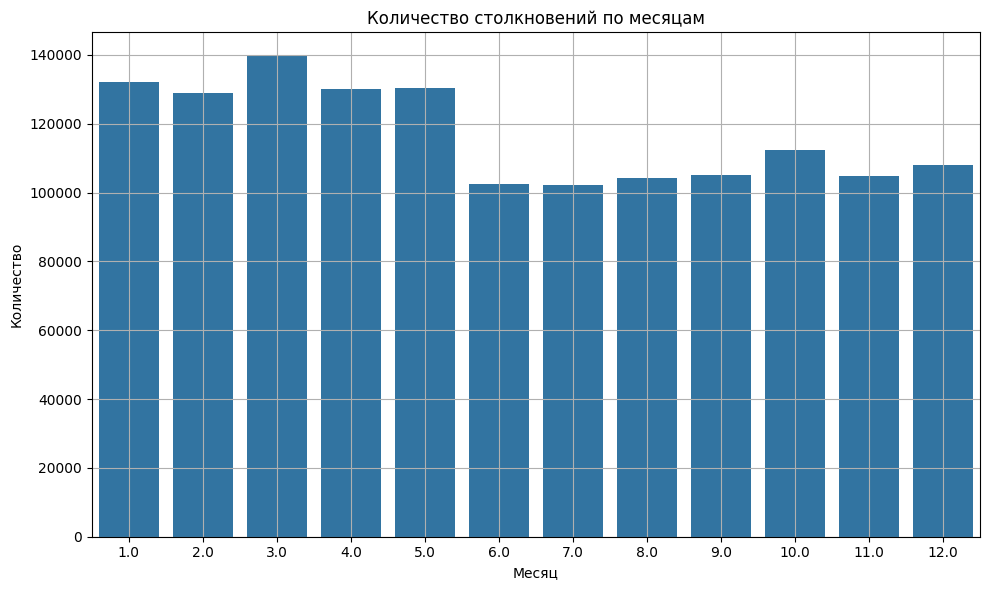

In [47]:
# Построим график количества столкновений по месяцам

plt.figure(figsize=(10, 6))
sns.barplot(data=total_collisions, x='month', y='total')
plt.title('Количество столкновений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.grid(True)
plt.tight_layout()
plt.show()

### Вывод


- Построен график
- Больше всего аварий пришлось на первую половину года с января по май, в июне количество аварий значительно снизилось

### 3.2. Cоздать подходящие аналитические задачи и поручить их решение коллегам

#### 3.2.1. Создать не менее шести задач для коллег

Задачи

- Анализ зависимости тяжести ДТП от возраста автомобиля
- Влияние использования телефона на виновность в ДТП
- Какие типы автомобилей чаще попадают в аварии в плохую погоду
- Связь между типом участника и тяжестью происшествия
- Частота ДТП в зависимости от страховки участников
- Какой тип КПП чаще у участников аварий с превышением скорости

#### 3.2.2. Прописать порядок решения для двух задач из списка


- Постройте график
- Сделайте вывод

**1. Анализ зависимости тяжести ДТП от возраста автомобиля**

In [48]:
# Посмотрим что получилось

vehicle_collisions

,age_group,collision_damage,count,percentage
0,11-15 лет,scratch,26506,46.57
1,11-15 лет,middle damage,13744,24.15
2,11-15 лет,small damage,12454,21.88
3,11-15 лет,severe damage,2512,4.41
4,11-15 лет,fatal,1701,2.99
5,5-10 лет,scratch,233730,52.23
6,5-10 лет,middle damage,95738,21.40
7,5-10 лет,small damage,90474,20.22
8,5-10 лет,severe damage,19860,4.44
9,5-10 лет,fatal,7659,1.71


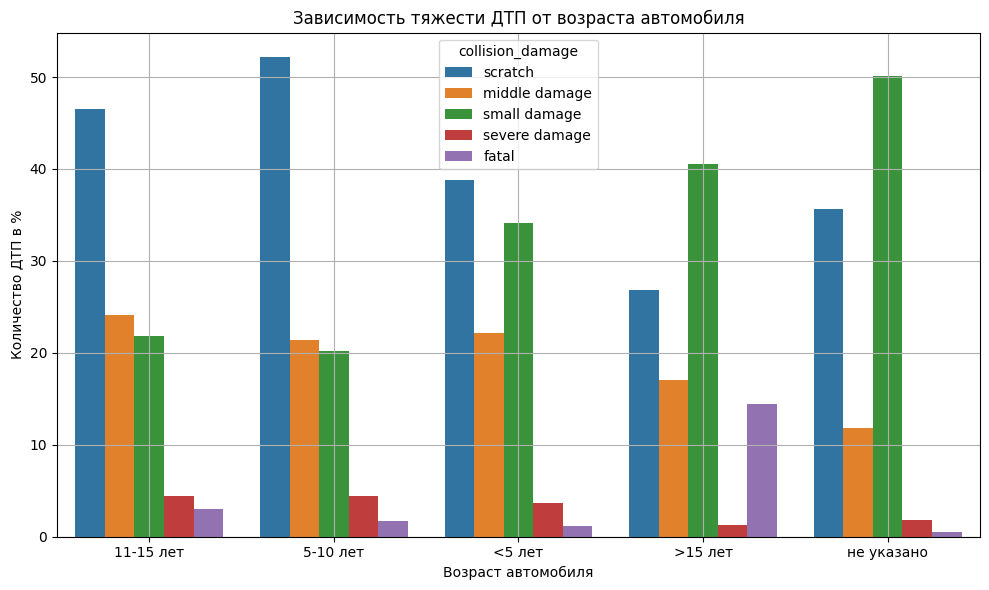

In [49]:
# Построим график зависимости тяжести ДТП от возраста автомобиля

plt.figure(figsize=(10, 6))
sns.barplot(data=vehicle_collisions, x='age_group', y='percentage', hue='collision_damage')
plt.title('Зависимость тяжести ДТП от возраста автомобиля')
plt.xlabel('Возраст автомобиля')
plt.ylabel('Количество ДТП в %')
plt.grid(True)
plt.tight_layout()
plt.show()

**Вывод**

С увеличением возраста автомобиля увеличивается вероятность тяжёлого исхода ДТП. Особенно это касается фатальных и серьёзных повреждений. Новые машины чаще участвуют в авариях с меньшими последствиями.

**Влияние использования телефона на виновность в ДТП**

In [50]:
# Посмотрим что получилось

phone_collisions

,cellphone_in_use,total_parties,at_fault_count,at_fault_percentage
0,0.0,2194946,1039014,47.34
1,1.0,45825,24772,54.06
2,NaN,511637,224341,43.85


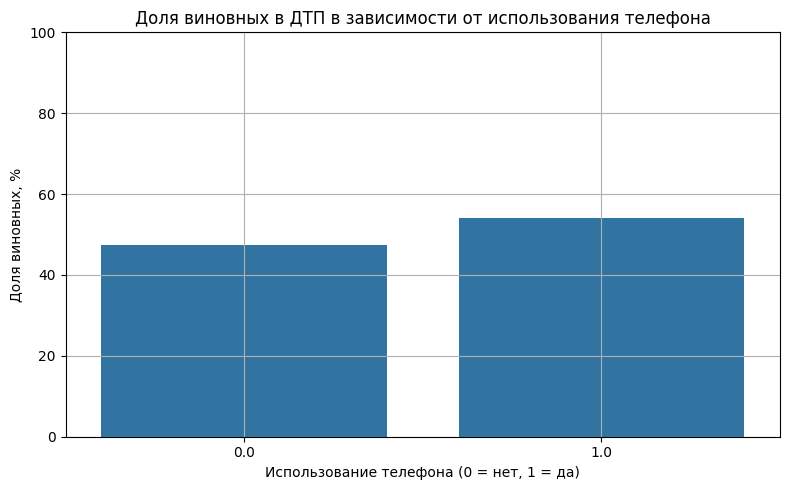

In [51]:
# Построим график зависимости тяжести ДТП от возраста автомобиля

plt.figure(figsize=(8, 5))
sns.barplot(data=phone_collisions, x='cellphone_in_use', y='at_fault_percentage')
plt.title('Доля виновных в ДТП в зависимости от использования телефона')
plt.xlabel('Использование телефона (0 = нет, 1 = да)')
plt.ylabel('Доля виновных, %')
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

**Вывод**

По графику можно сделать вывод о том, что использование телефона за рулем чаще приводит к авариям. Доля аварий без использования телефона около 45% а с телефоном около 55%.

## 4. Создайте модель для оценки водительского риска

### 4.1. Проведите первичный отбор факторов, необходимых для модели

Изучите описание факторов. Нужно отобрать те, которые могут влиять на вероятность ДТП. Будет хорошо, если вы аргументируете свой выбор. 

Пример:

columms =['party_type',     # Тип участника происшествия. Таблица parties
          'party_sobriety', # Уровень трезвости виновника (точно может влиять) Таблица parties
           ......
         ] 

**collisions (информация о происшествиях)**

CASE_ID Идентификационный Номер в базе данных - нужен был нам только для объединения таблиц. Удаляем.

COLLISION_DATE Дата происшествия - признак является последствием ДТП. Удаляем.

COLLISION_TIME Время происшествия - признак является последствием ДТП. Удаляем.

INTERSECTION Является ли место происшествия перекрёстком - признак является последствием ДТП. Удаляем.

***WEATHER_1*** Погода - важный признак, при снегопаде или тумане например видимость ухудшается и вероятность ДТП возрастает. Оставляем.

COLLISION_DAMAGE Серьёзность происшествия - признак является последствием ДТП. Удаляем.

PRIMARY_COLL_FACTOR Основной фактор аварии - признак является последствием ДТП. Удаляем.

***ROAD_SURFACE*** Состояние дороги - важный признак, плохое состояние дороги ухудшает управляемость и торможение, может привести к поломкам авто и как следствие к аварии. Мы можем заранее знать маршрут которым поедет водитель и качество покрытия. Оставляем.

***LIGHTING*** Освещение - в темноте управлять авто сложнее чем днем. Важный признак. Оставляем.

***COUNTY_CITY_LOCATION*** Номер географических районов, где произошло ДТП - в каких-то районах дтп происходят чаще чем в других. Также, скорее всего водитель знает куда собирается отправится. - Оставляем.

***COUNTY_LOCATION*** Названия географических районов, где произошло ДТП - аналогично предыдущему пункту. Оставляем.

***DIRECTION*** Направление движения - например солнце светит в глаза и слепит. Думаю влияние на целевую переменную есть но не сильное. Оставляем.

***DISTANCE*** Расстояние от главной дороги (метры) - не понятно что это значит. Ближе к главной дороге, скорее всего больше авто и следовательно выше шанс ДТП. Оставляем.

***LOCATION_TYPE*** Тип дороги - думаю важный признак, на перекрестках аварии чаще чем на шоссе. Оставляем.

PARTY_COUNT Количество участников - признак является последствием ДТП. Удаляем.

PCF_VIOLATION_CATEGORY Категория нарушения - признак является последствием ДТП. Удаляем.

TYPE_OF_COLLISION Тип аварии - признак является последствием ДТП. Удаляем.

MOTOR_VEHICLE_INVOLVED_WITH Дополнительные участники ДТП - признак является последствием ДТП. Удаляем.

***ROAD_CONDITION_1*** Дорожное состояние - важный признак. Ямы, песок, ширина дороги все это в худшую сторону влияет на безопасность движения. Оставляем.

**Parties (описание участников происшествия)**

CASE_ID Идентификационный  номер в базе данных - нужен был нам только для объединения таблиц. Удаляем.

PARTY_NUMBER Номер участника происшествия - думаю не влияет ни на что. Удаляем.

PARTY_TYPE Тип участника происшествия - мы отобрали только значение 'car'. Удаляем.

***AT_FAULT*** Виновность участника - ЦЕЛЕВАЯ ПЕРЕМЕННАЯ

***INSURANCE_PREMIUM Сумма страховки (тыс. $)*** - знаем сразу какая страховка у водителя, возможно сумма страховки как-то влияет на ощущения водителя своей защищенности при поездке, водитель может нарпимер позволить себе нарушить правила если будет знать, что при аварии страховка покроет все затраты. Оставляем.

PARTY_DRUG_PHYSICAL Состояние участника: физическое или с учётом принятых лекарств - не знаем состояние участника пока его не провери после ДТП. Удаляем

PARTY_SOBRIETY Трезвость участника - тоже что и прошлый признак. Не можем знать трезвый водитель или пьяный до наступления ДТП.

***CELLPHONE_IN_USE*** Наличие телефона в автомобиле (возможности разговаривать по громкой связи). - разговоры по телефону отвлекают от вождения. Оставляем.

**Vehicles (Описание автомобиля)**

ID Индекс текущей таблицы - не нужен нам. Удаляем.

CASE_ID Идентификационный номер в базе данных - для объединения таблиц. Удаляем.

PARTY_NUMBER Номер участника происшествия - также как и в прошлой таблице. Удаляем.

***VEHICLE_TYPE*** Тип кузова - минивены более тяжелые и хуже управляемы чем например купе или седаны. Думаю это важный признак. Оставляем.

***VEHICLE_TRANSMISSION*** Тип КПП - на АКПП ездить легче чем на МКПП, возможно как-то влияет на вину особенно у водителей-новичков. Оставляем.

***VEHICLE_AGE*** Возраст автомобиля (в годах) - важный признак. Старые авто чаще ломаются, что может привести в аварии и ичем авто старше тем этот риск больше. Оставляем

### Вывод

Выбрали признаки имеющие отношение к вине в ДТП, создали отсортированный датафрейм.

### 4.2. Подготовьте набор данных на основе первичного предположения заказчика

In [52]:
# Посмотрим что получилось

pd.set_option('display.max_columns', None)
df.head()

,weather_1,road_surface,lighting,county_city_location,county_location,direction,distance,location_type,road_condition_1,at_fault,insurance_premium,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age
0,clear,dry,dark with street lights,708,contra costa,east,21.0,NaN,normal,0,54.0,0.0,sedan,manual,10.0
1,clear,dry,daylight,5604,ventura,north,150.0,highway,normal,0,NaN,0.0,sedan,auto,NaN
2,clear,dry,dark with street lights,3607,san bernardino,north,400.0,NaN,normal,1,43.0,0.0,sedan,auto,8.0
3,clear,dry,dark with no street lights,2908,nevada,east,190.0,NaN,normal,1,38.0,0.0,sedan,auto,6.0
4,cloudy,wet,daylight,1600,kings,east,2640.0,highway,normal,1,20.0,0.0,sedan,auto,11.0


In [53]:
df.shape

(56248, 15)

In [54]:
df_sorted = df.copy()

### Вывод

Исходная таблица подготовлена

### 4.3. Проведите статистическое исследование отобранных факторов

- По результату исследовательского анализа внесите корректировки, если они нужны. Сделайте вывод.
- Если необходимо, категоризируйте исходные данные, проведите масштабирование.
- Подготовьте обучающую и тестовую выборки.

#### 4.3.1. Изучение общей информации о датасете

In [55]:
def overview_data(data):
    """
    Выводит информацию о DataFrame - типы данных, 
    статистику, количество пропусков и дубликатов

    Параметры
    ----------
    data : pandas.DataFrame
        Таблица данных, для которой требуется провести обзор

    Возвращает
    ----------
    None
        Функция выводит информацию
    """
    
    
    d = '-' * 50
    
    print(d)
    print('Инфо')
    print(d)
    print(data.info())
    print('\n')
    
    print(d)
    print('Статистика')
    print(d)
    print(data.describe())
    print('\n')
    
    print(d)
    print('Пропуски')
    print(d)
    print(data.isna().sum())
    print('\n')
    
    print(d)
    print('Дубликаты')
    print(d)
    print(data.duplicated().sum())
    print('\n')

    print(d)
    print('Нулевые значения')
    print(d)
    print((data == 0).sum())
    print('\n')

In [56]:
# Выведем общую информацию о датасете df_sorted

overview_data(df_sorted)

--------------------------------------------------
Инфо
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 56248 entries, 0 to 56247
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weather_1             56080 non-null  object 
 1   road_surface          55900 non-null  object 
 2   lighting              56094 non-null  object 
 3   county_city_location  56248 non-null  int64  
 4   county_location       56248 non-null  object 
 5   direction             43230 non-null  object 
 6   distance              56248 non-null  float64
 7   location_type         25932 non-null  object 
 8   road_condition_1      55999 non-null  object 
 9   at_fault              56248 non-null  int64  
 10  insurance_premium     55701 non-null  float64
 11  cellphone_in_use      51777 non-null  float64
 12  vehicle_type          56248 non-null  object 
 13  vehicle_transmissio

In [57]:
df_sorted.head()

,weather_1,road_surface,lighting,county_city_location,county_location,direction,distance,location_type,road_condition_1,at_fault,insurance_premium,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age
0,clear,dry,dark with street lights,708,contra costa,east,21.0,NaN,normal,0,54.0,0.0,sedan,manual,10.0
1,clear,dry,daylight,5604,ventura,north,150.0,highway,normal,0,NaN,0.0,sedan,auto,NaN
2,clear,dry,dark with street lights,3607,san bernardino,north,400.0,NaN,normal,1,43.0,0.0,sedan,auto,8.0
3,clear,dry,dark with no street lights,2908,nevada,east,190.0,NaN,normal,1,38.0,0.0,sedan,auto,6.0
4,cloudy,wet,daylight,1600,kings,east,2640.0,highway,normal,1,20.0,0.0,sedan,auto,11.0


**Вывод**

- нужно заполнить пропуски

#### 4.3.2. Исследовательский анализ

In [58]:
def num_diag(data, x, xlabel='', ylabel='', hue=None, discrete_threshold=20):
    """
    Строит графики распределения числового признака.

    Для дискретных признаков (целочисленные и <= discrete_threshold уникальных значений) используется:
    - Countplot
    - Boxplot по категориям (если указан hue)

    Для непрерывных признаков:
    - Гистограмма плотности (histplot)
    - Обычный boxplot

    Параметры:
    ----------
    data : pd.DataFrame
        Таблица с данными.
    x : str
        Название числового признака.
    xlabel : str, optional
        Подпись оси X (по умолчанию — пусто).
    ylabel : str, optional
        Подпись оси Y для гистограммы (по умолчанию — пусто).
    hue : str, optional
        Название категориального признака для разделения по цвету.
    discrete_threshold : int, optional
        Максимальное число уникальных значений, чтобы считать признак дискретным (по умолчанию 20).
    """
    is_discrete = data[x].nunique() <= discrete_threshold

    if is_discrete:
        plt.figure(figsize=(14, 5))
        sns.countplot(data=data, x=x, hue=hue)
        plt.title(f'Распределение по: {xlabel}')
        plt.xlabel(xlabel)
        plt.ylabel('Количество')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        sns.histplot(data=data, x=x, hue=hue, ax=axes[0], stat='density', bins=20, common_norm=False)
        axes[0].set_title(f'Гистограмма по {xlabel}')
        axes[0].set_xlabel(xlabel)
        axes[0].set_ylabel(ylabel)

        sns.boxplot(data=data, x=x, ax=axes[1])
        axes[1].set_title(f'Boxplot по {xlabel}')
        axes[1].set_xlabel(xlabel)
        axes[1].set_ylabel(ylabel)

        plt.tight_layout()
        plt.show()

In [59]:
# Напишем функцию построения диаграмм для категориальных признаков

def cat_diag(data, x, xlabel, hue=None, threshold=0.015):
    """
    Строит диаграммы распределения для категориального признака: 
    countplot с группировкой и круговую диаграмму

    Малые категории по частоте объединяются в категорию "Другие"

    Параметры
    ----------
    data : pandas.DataFrame
        Таблица с данными, содержащая категориальный признак

    x : str
        Название категориального признака, по которому строятся графики

    xlabel : str
        Подпись оси X на countplot

    hue : str, optional
        Название категориального признака для группировки по цветам на countplot

    threshold : float, optional
        Порог частоты (от 0 до 1), ниже которого категории объединяются в "Другие" 
        По умолчанию 0.015 (1.5%)

    Возвращает
    ----------
    None
        Функция строит графики
    """
        
        
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    value_counts = data[x].value_counts(normalize=True)
    small_categories = value_counts[value_counts<threshold].index
    data_modified = data.copy()
    data_modified[x] = data_modified[x].apply(lambda val: 'Другие' if val in small_categories else val)
    
    sns.countplot(
        data=data_modified,
        x=x,
        hue=hue,
        ax=axes[0],
        order=data_modified[x].value_counts().index)
    axes[0].set_title(f'Диаграмма по {xlabel}')
    axes[0].set_ylabel('Количество')
    axes[0].set_xlabel(xlabel)
    axes[0].tick_params(axis='x', rotation=45)
    
    pie_data = data_modified[x].value_counts(normalize=True)
    
    pie_data.plot(
        kind='pie',
        labels=pie_data.index,
        legend=False,
        autopct='%1.0f%%',
        ax=axes[1],
        startangle=90,
        counterclock=False)
    axes[1].set_title('Распределение долей')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()

In [60]:
def all_diag(data, column_type='numeric', hue=None):
    """
    Автоматически визуализирует признаки заданного типа: числовые, категориальные или временные.

    В зависимости от типа признаков вызывает соответствующие функции визуализации 
    (num_diag, cat_diag, date_diag) для каждого подходящего столбца в DataFrame.

    Параметры
    ----------
    data : pandas.DataFrame
        Таблица данных для анализа

    column_type : str, optional
        Тип признаков для визуализации. Возможные значения:
        - 'numeric' — числовые признаки
        - 'categorical' — категориальные признаки
        - 'date' или 'datetime' — временные признаки

    hue : str, optional
        Название столбца для цветовой группировки, если нужно

    Возвращает
    ----------
    None
         Функция строит график
    """     
    
    
    if column_type == 'numeric':
        columns = data.select_dtypes(include='number').columns
    elif column_type == 'categorical':
        columns = data.select_dtypes(include=['object', 'category']).columns
    elif column_type in ('date', 'datetime'):
        columns = data.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
        
    for col in columns:
        if column_type == 'numeric':
            print(f'Визуализация числового признака: {col}')
            num_diag(data, x=col, xlabel=col, ylabel='Плотность распределения', hue=hue)
        elif column_type == 'categorical':
            print(f'Визуализация категориального признака {col}')
            cat_diag(data, x=col, xlabel=col, hue=hue)
        elif column_type == 'date':
            print(f'Визуализация верменного признака: {col}')
            date_diag(data, x=col, hue=hue)

In [61]:
# Создадим копию датасета

df_eda = df_sorted.copy()

Проверим категориальные столбцы на неявные дубликаты

In [62]:
for col in df_eda.select_dtypes(include=['object', 'category']).columns:
    print(f"\nРаспределение значений в столбце: {col}")
    print(df_eda[col].value_counts())


Распределение значений в столбце: weather_1
weather_1
clear      45092
cloudy      8427
raining     2178
fog          181
snowing      157
other         34
wind          11
Name: count, dtype: int64

Распределение значений в столбце: road_surface
road_surface
dry         50242
wet          5258
snowy         357
slippery       43
Name: count, dtype: int64

Распределение значений в столбце: lighting
lighting
daylight                                   38064
dark with street lights                    11017
dark with no street lights                  5109
dusk or dawn                                1769
dark with street lights not functioning      135
Name: count, dtype: int64

Распределение значений в столбце: county_location
county_location
los angeles        16236
orange              5364
san diego           3740
san bernardino      3649
riverside           3313
sacramento          2185
alameda             1876
santa clara         1845
ventura             1466
kern                1415


Неявных дубликатов нет

Визуализация числового признака: county_city_location


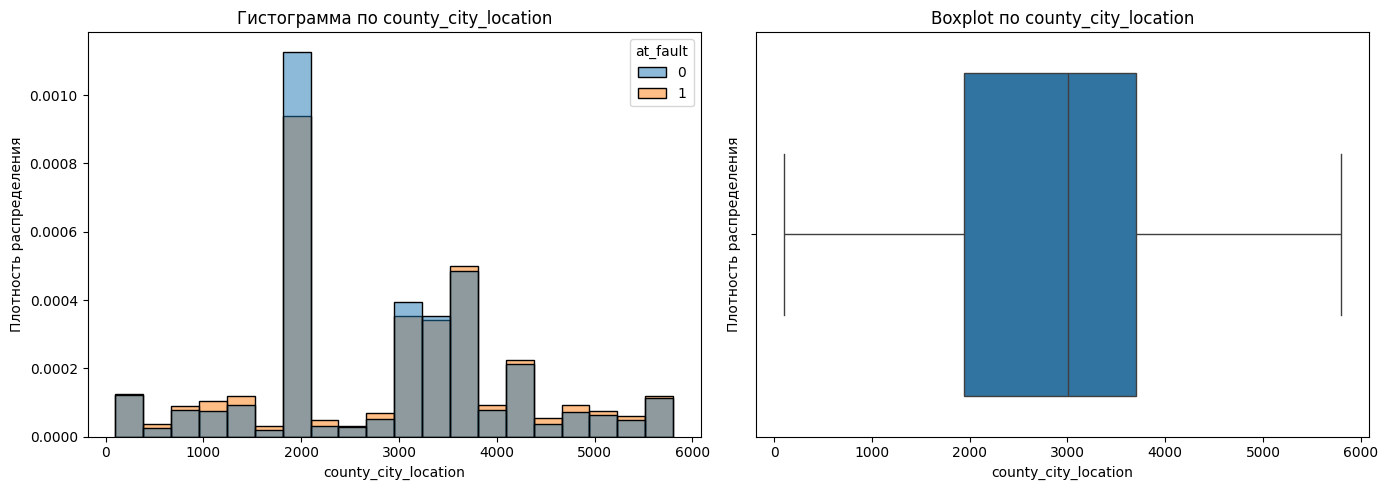

Визуализация числового признака: distance


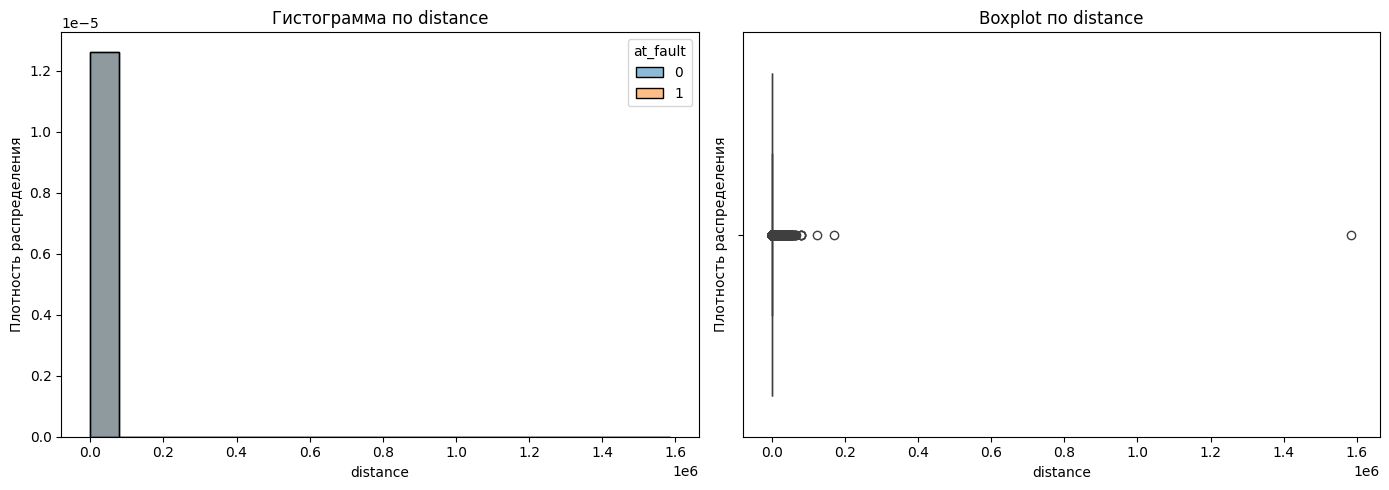

Визуализация числового признака: at_fault


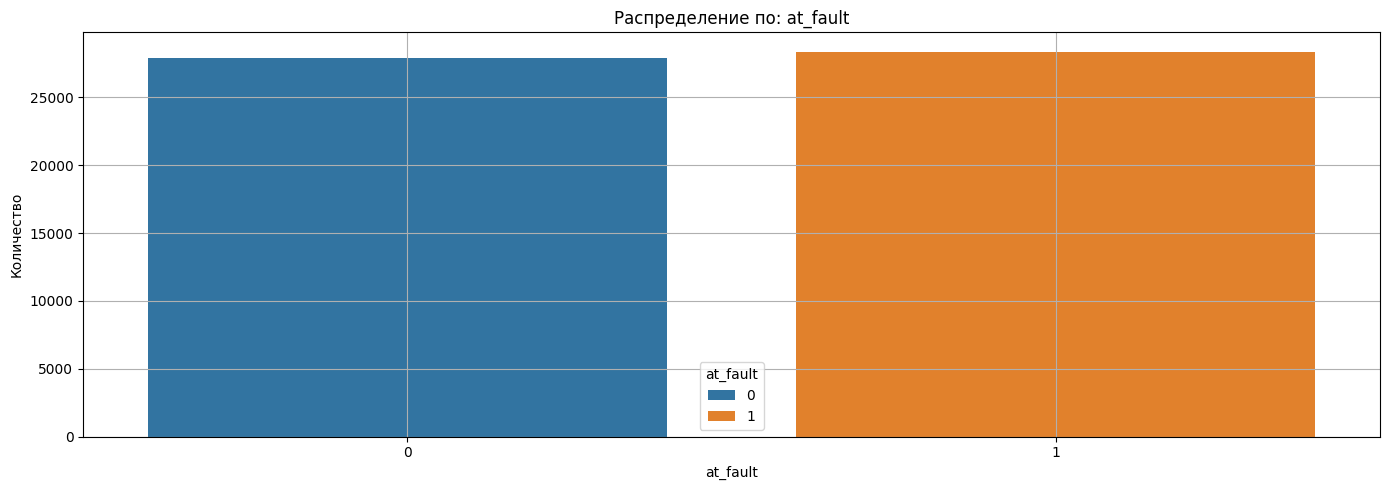

Визуализация числового признака: insurance_premium


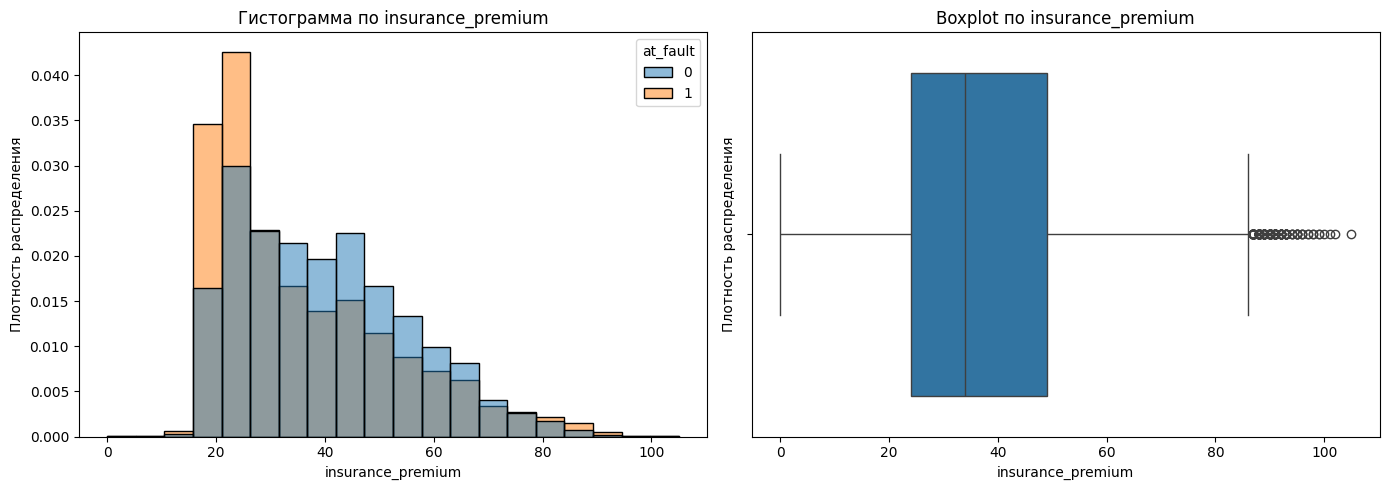

Визуализация числового признака: cellphone_in_use


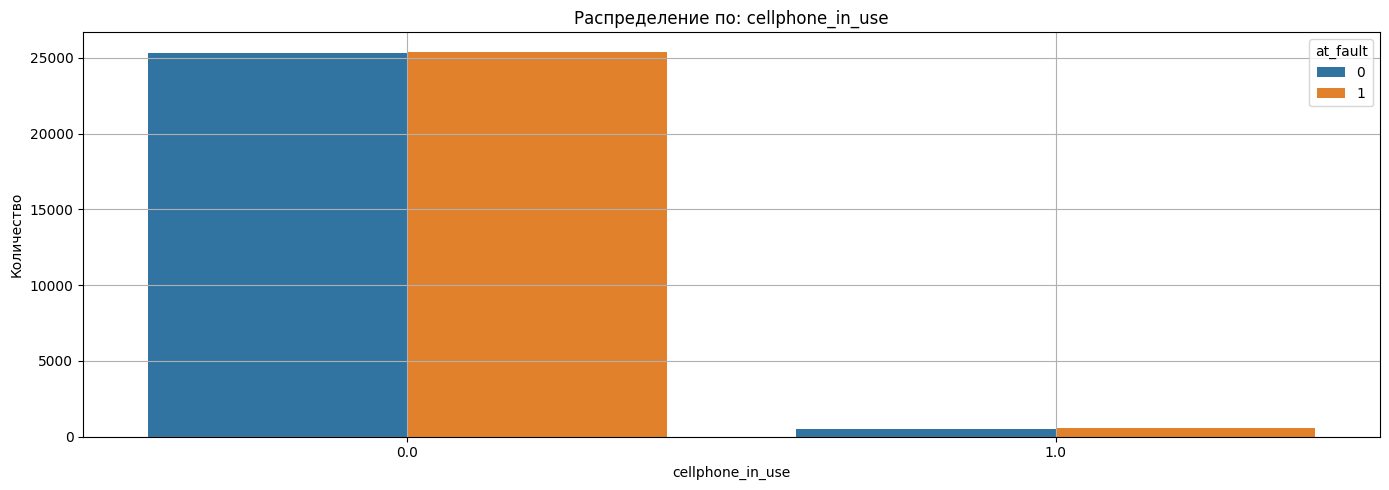

Визуализация числового признака: vehicle_age


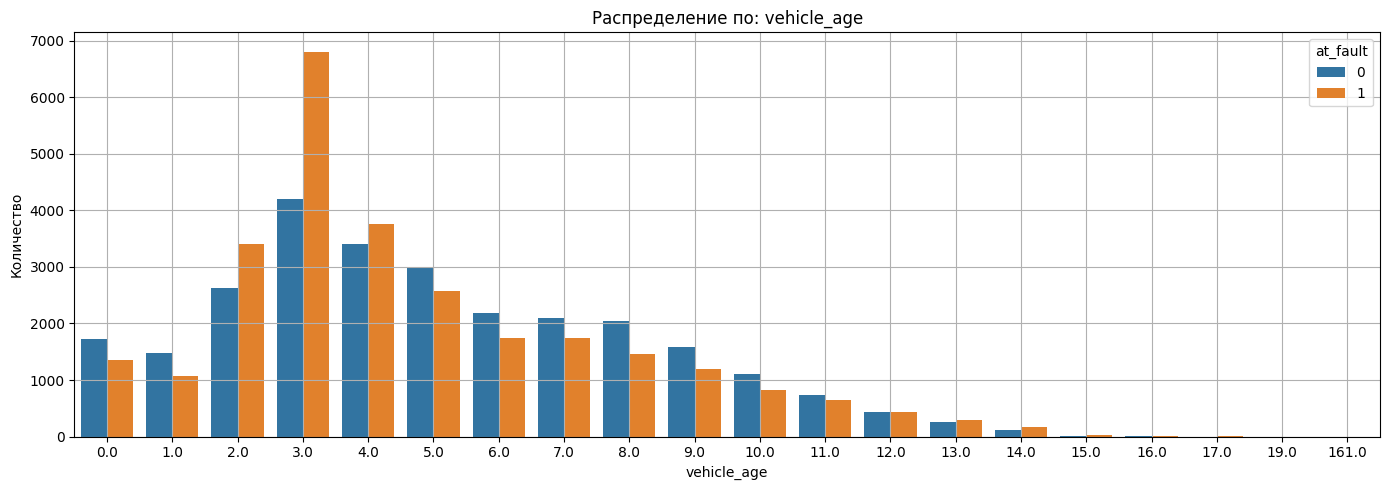

In [63]:
# Визуализируем числовые признаки

all_diag(df_eda, column_type='numeric', hue='at_fault')

distance - есть выбросы в расстоянии до главной дороги.

at_fault - целевая переменная, распределена примерно 50 на 50.

insurance_premium - величина страховки. С низкой и высокой страховкой доля виновных больше чем со средними значениями страховок. Думаю важный признак.

cellphone_in_use - доля использующих телефон очень мала. Думаю это важный признак.

vehicle_age - есть выбросы в возрасте авто. Основная часть авто возрастом до 10 лет.

distance - есть выбросы в расстоянии до главной дороги.

Визуализация категориального признака weather_1


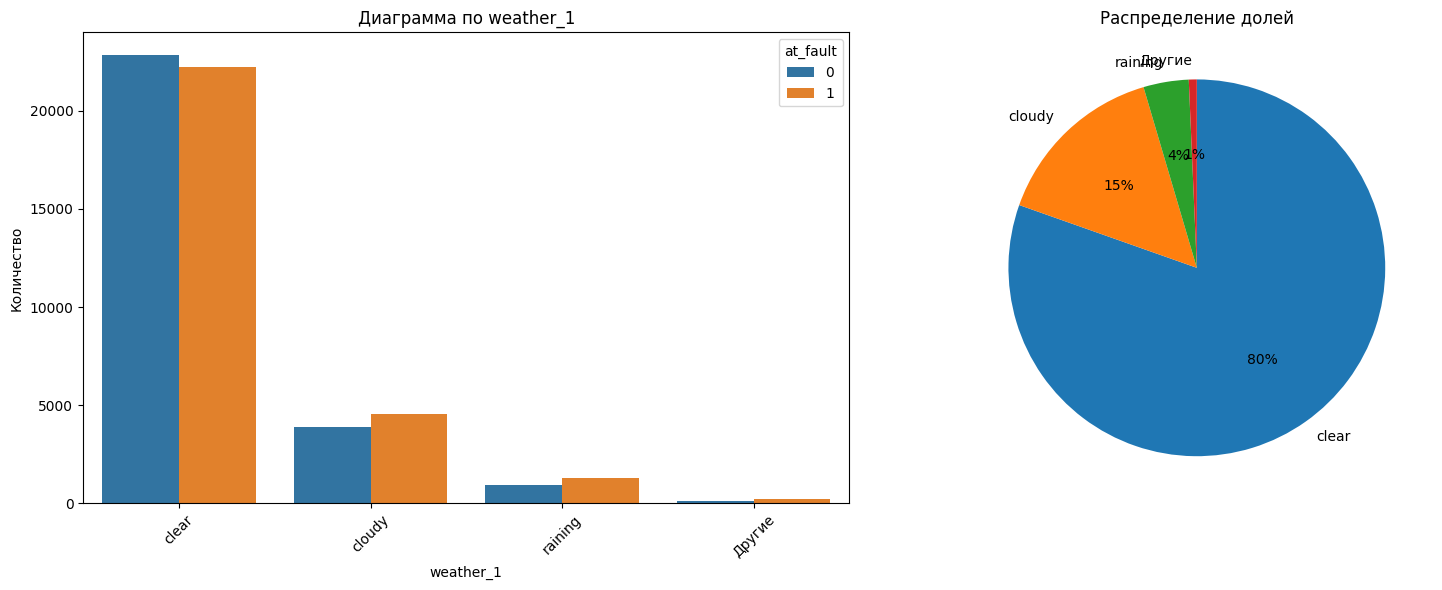

Визуализация категориального признака road_surface


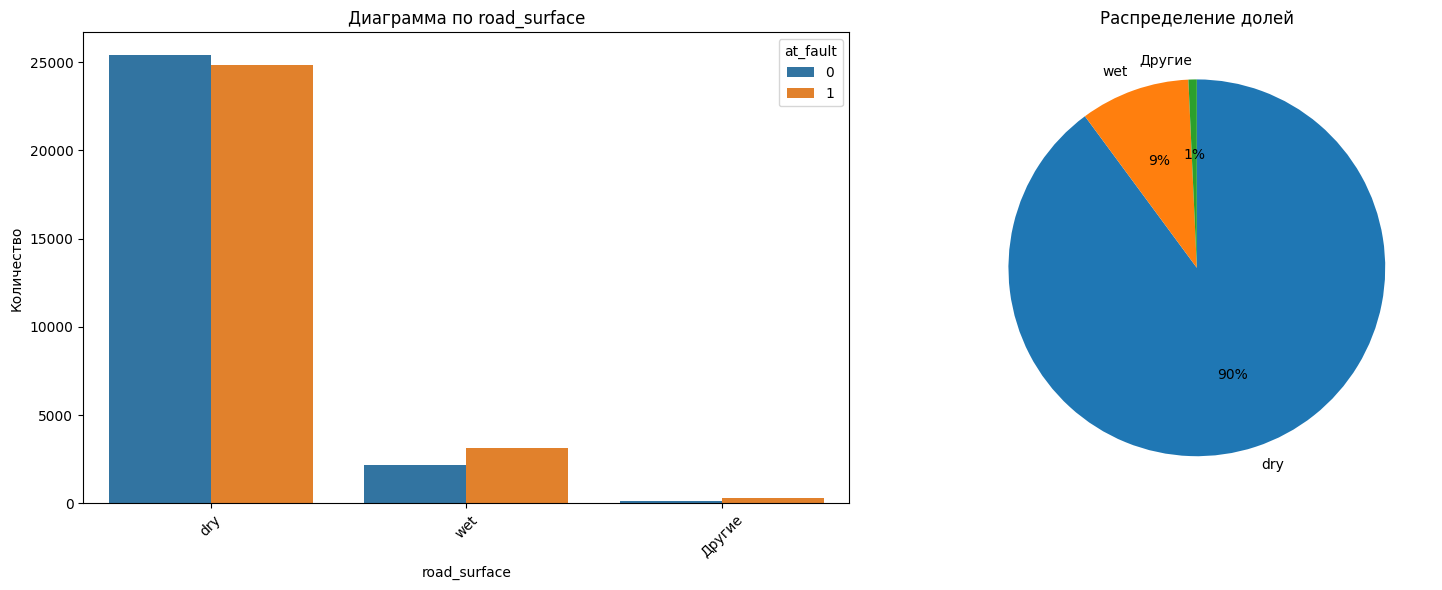

Визуализация категориального признака lighting


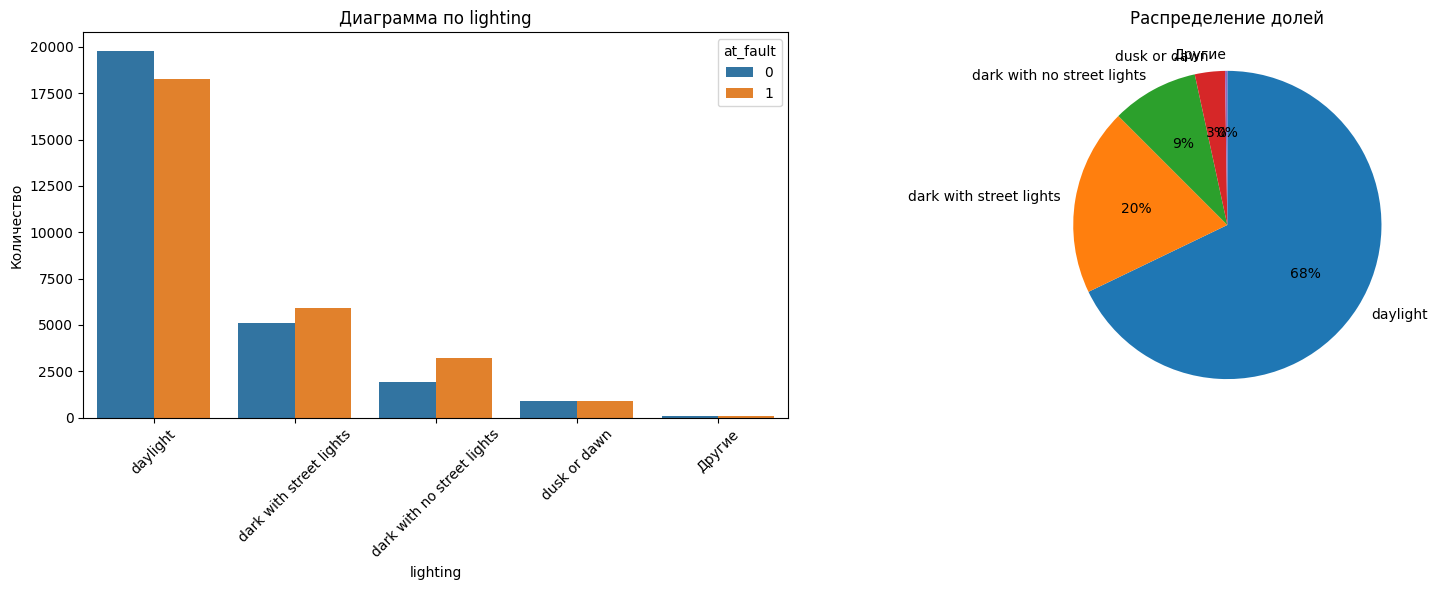

Визуализация категориального признака county_location


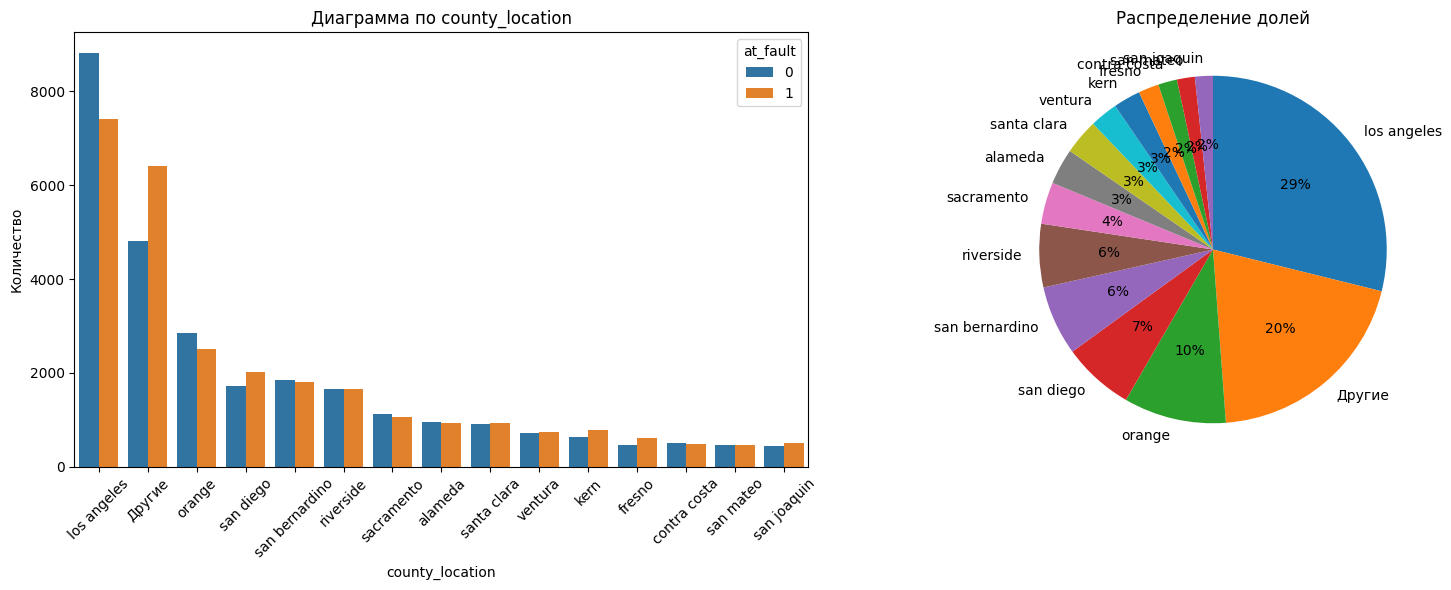

Визуализация категориального признака direction


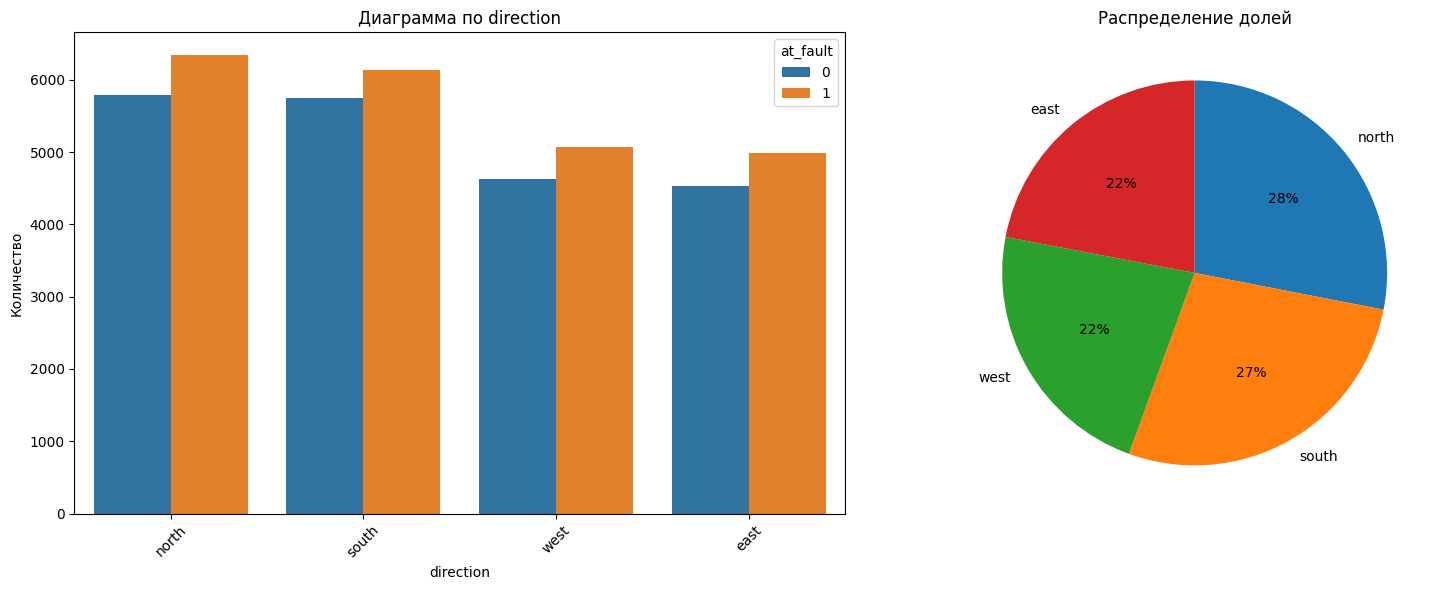

Визуализация категориального признака location_type


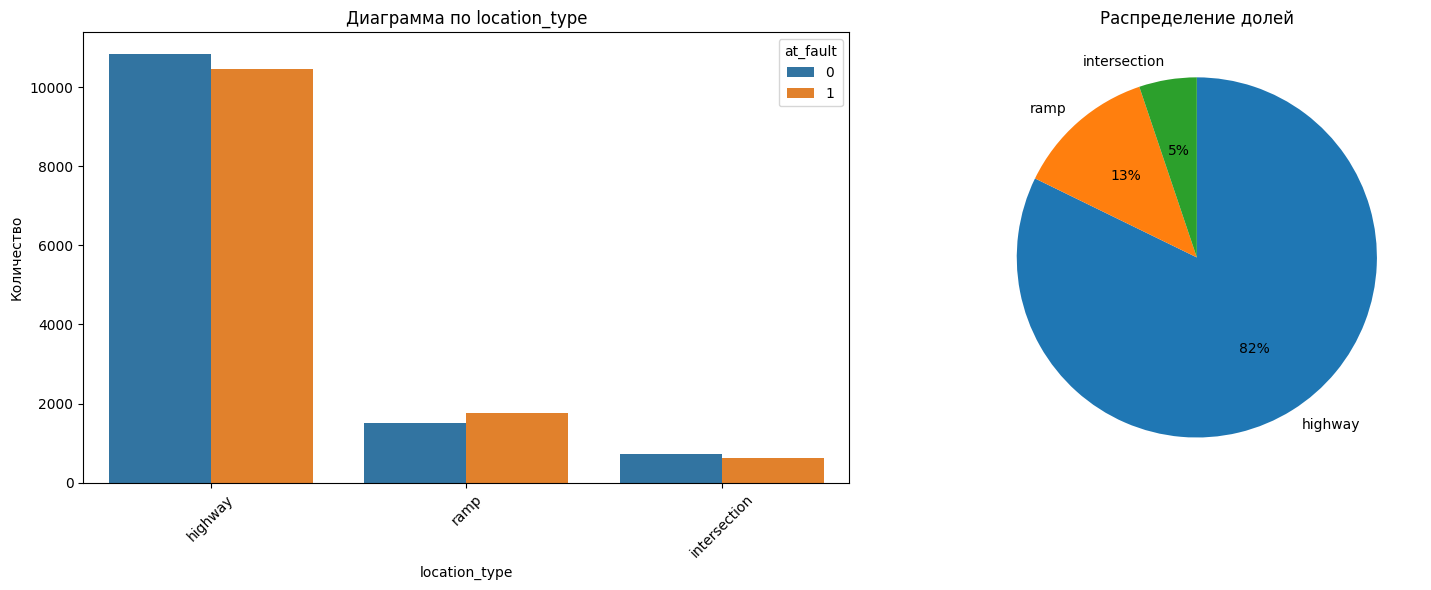

Визуализация категориального признака road_condition_1


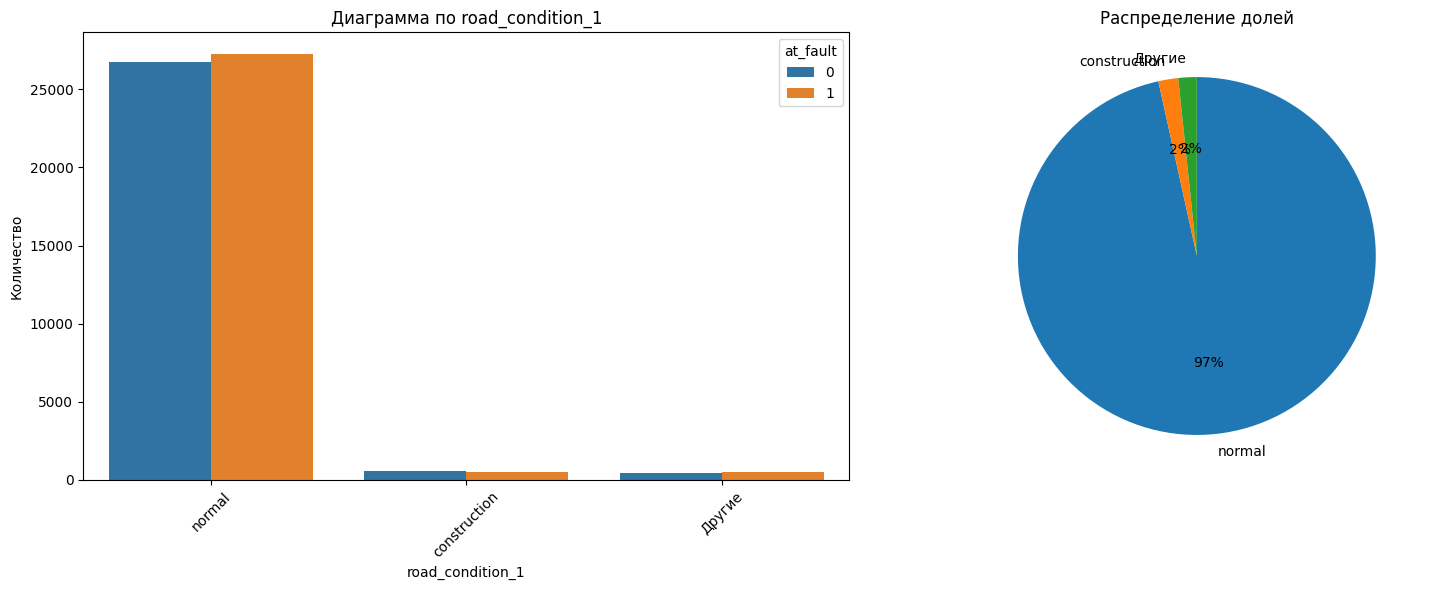

Визуализация категориального признака vehicle_type


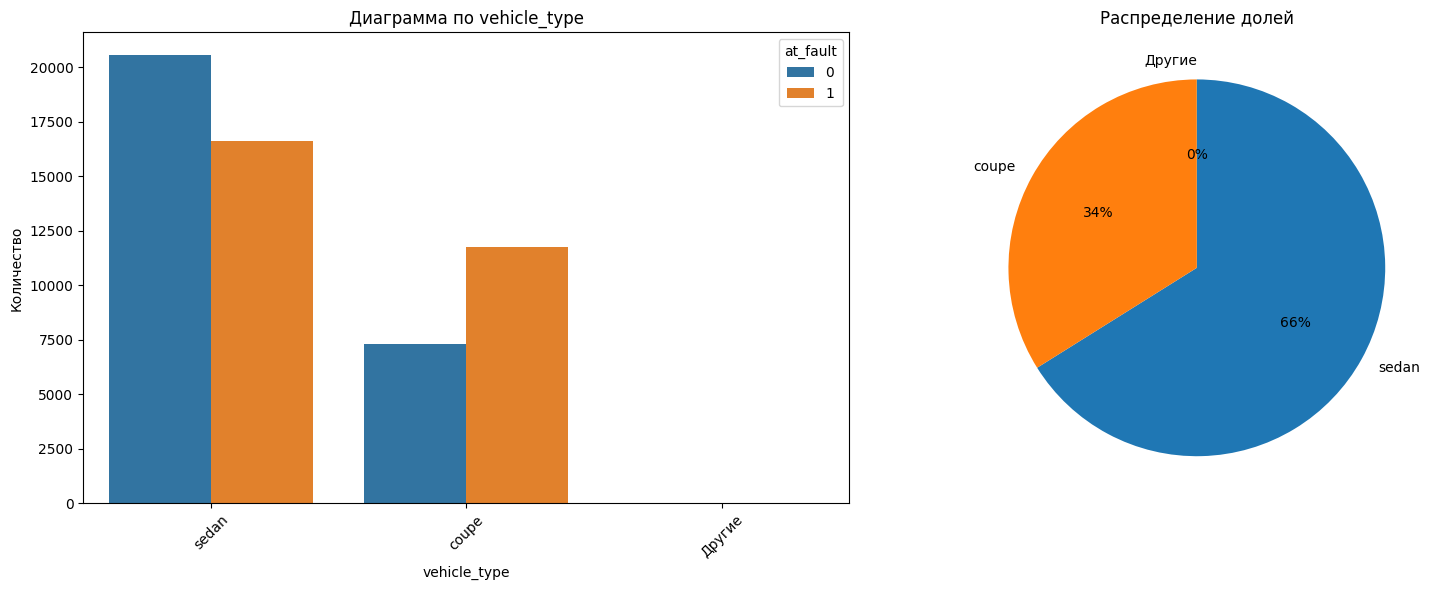

Визуализация категориального признака vehicle_transmission


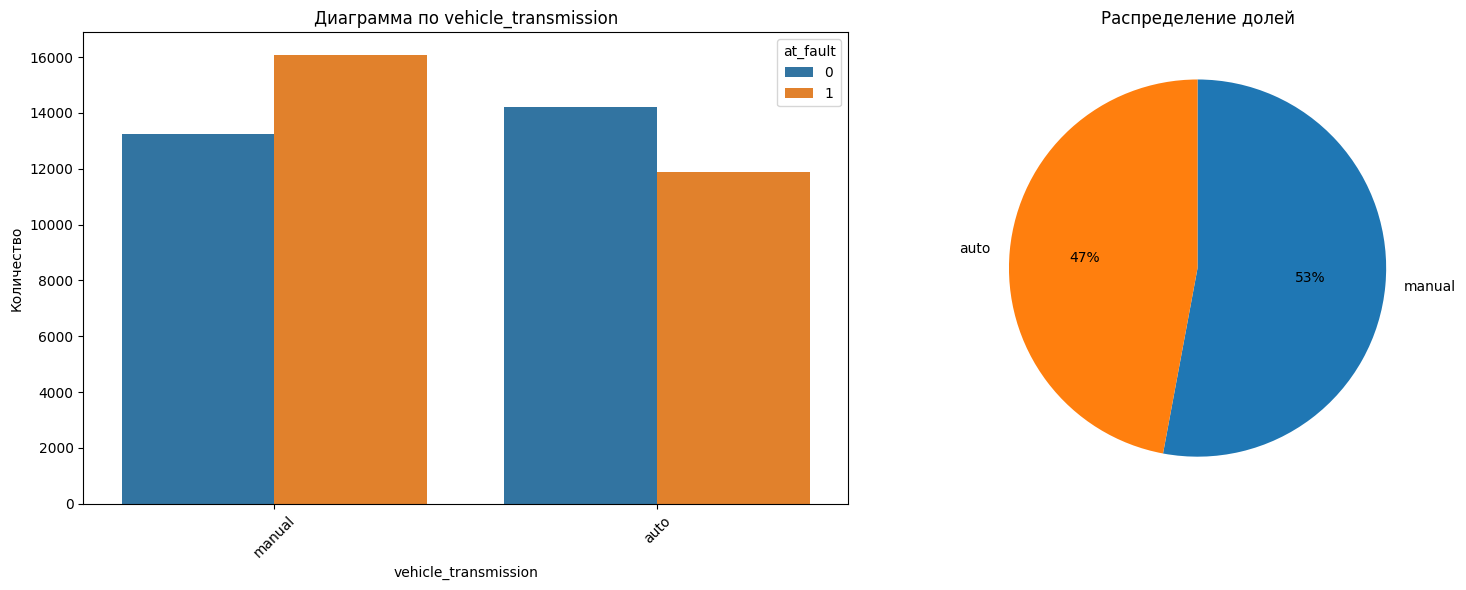

In [64]:
# Визуализируем категориальные признаки

all_diag(df_eda, column_type='categorical', hue='at_fault')

weather_1 - большинство аварий просходит при ясной погоде, но это думаю потому, что ясных дней в году просто больше. Когда погода портится, доля виновных в ДТП становится больше. Возможно фажный фактор.

road_surface - Хотя в сухую погоду виновных больше, но это связано с тем что сухих дней просто больше. Доля виновных в мокрую погоду больше чем в сухую. Может быть важным фактором.

lighting - больше всего проишествий происходит в дневное время суток. В темноту и без освещения доля ДТП больше. Думаю этот фактор может влиять на вину.

county_city_location - сложно понять что означают эти цифры. Думаю можно удалить этот признак.

county_location - больше всего аварий в Лос Анджелесе. Думаю признак не сильно влияет на виновность в ДТП.

direction - доля виновых в ДТП по всем направлением примерно одинаковая. Думаю этот признак не сильно влияет на вину.

location_type - основная доля ДТП происходит на хайвеях. Видно что на пересечениях дорог доля виновных больше чем например на хайвеях. Думаю это важный фактор.

road_condition_1 - состояние дороги в 96% нормальное, остальные состояния дороги занимают малую долю. Думаю этот признак также не сильно важен.

vehicle_type - самые частые типы кузова это седаны и купе. Доля виновных водителей купе больше чем седанов, а минивенов наоборот доля виноных значительно меньше. Думаю это связано с тем что минивены водят скорее всего семейные люди и они стараются водить более аккуратно, а купэ это более молодежный авто провоцирующий нарушать правида дорожного движения. Думаю это важный фактор.

vehicle_transmission - с автоматической коробкой передач доля виновных немного меньше. Думаю не важный фактор.


#### 4.3.3 Матрица корреляции

In [65]:
# Определим непрерывные признаки

interval_cols = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if df[col].nunique() > 20
]

In [66]:
# Вычислим матрицу Phik для нашего датасета

phk = df_eda.phik_matrix(verbose=False, interval_cols=interval_cols)

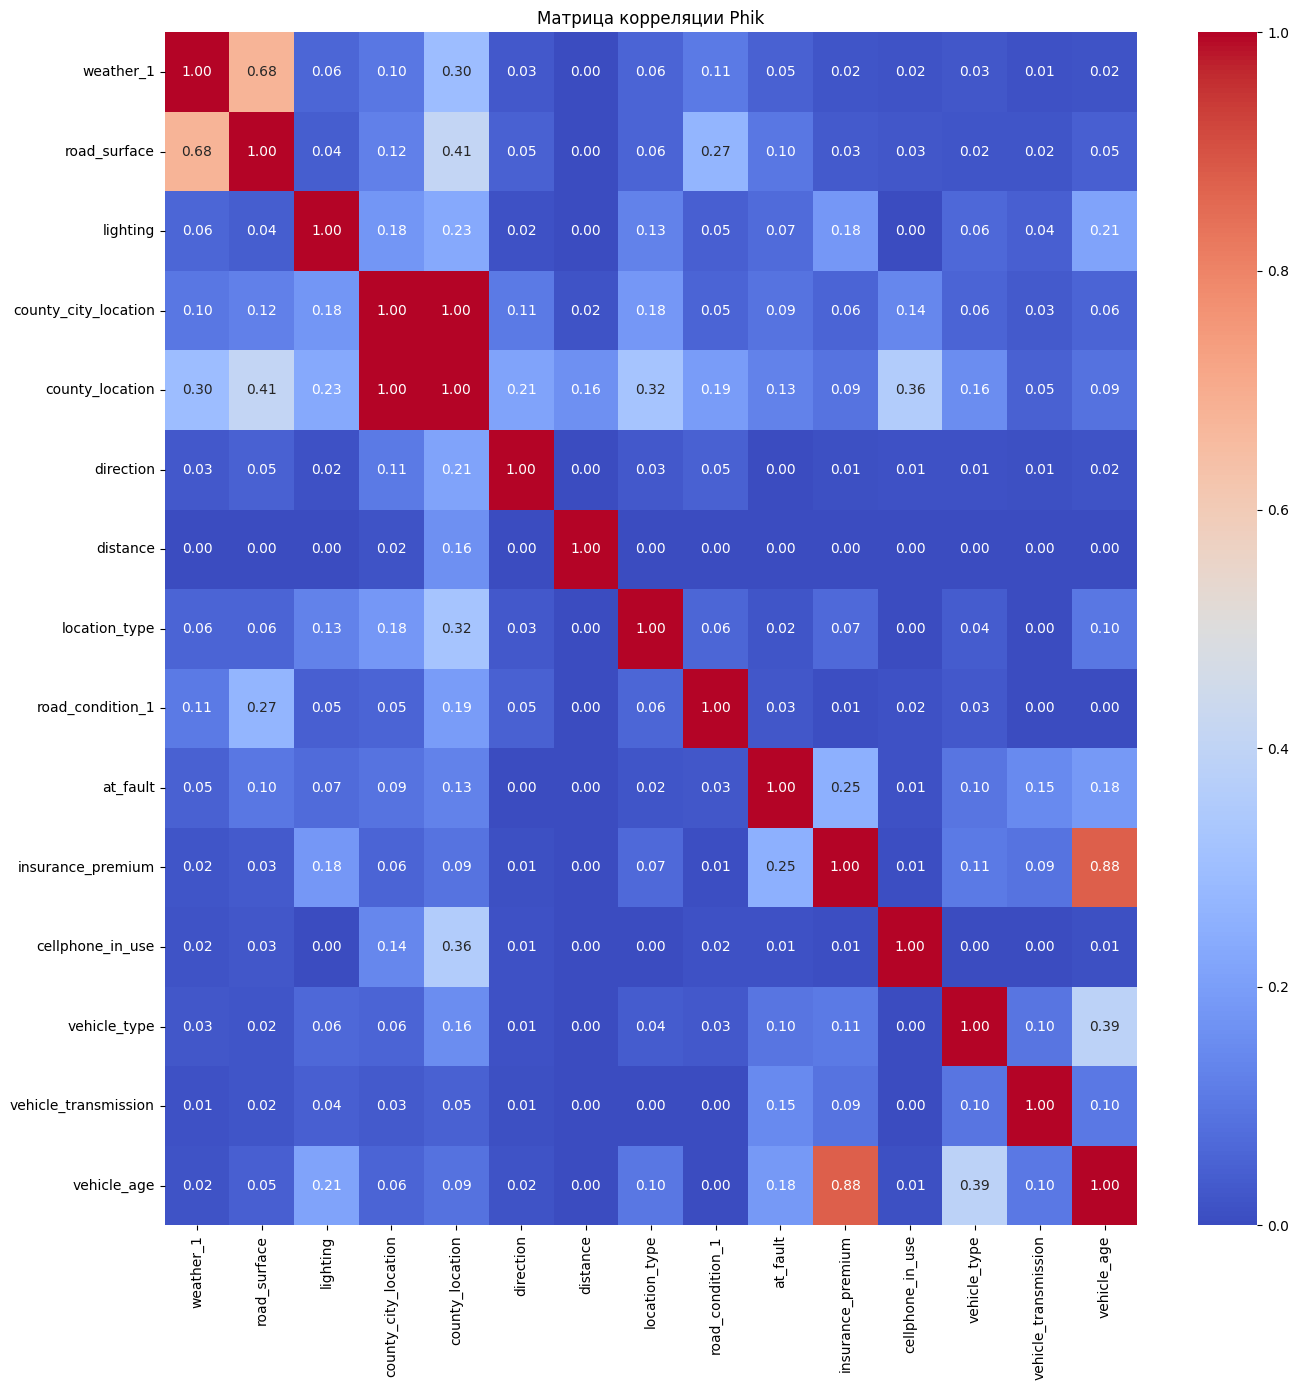

In [67]:
# Визуализируем матрицу корреляции

plt.figure(figsize=(14, 14))
plt.title('Матрица корреляции Phik')
sns.heatmap(phk, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Phik-корреляция с at_fault

Наиболее полезные признаки:
- insurance_premium - 0.25

Менее полезные признаки:
- county_city_location - 0.15
- county_location - 0.13
- vehicle_transmission - 0.15
- vehicle_age - 0.18

Остальные признаки имеют более слабую корреляцию с целевым признаком.

2 признака имеют 0ю корреляцию с целевым признаком, думаю их можно удалить - direction, distance

In [68]:
df_eda.head()

,weather_1,road_surface,lighting,county_city_location,county_location,direction,distance,location_type,road_condition_1,at_fault,insurance_premium,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age
0,clear,dry,dark with street lights,708,contra costa,east,21.0,NaN,normal,0,54.0,0.0,sedan,manual,10.0
1,clear,dry,daylight,5604,ventura,north,150.0,highway,normal,0,NaN,0.0,sedan,auto,NaN
2,clear,dry,dark with street lights,3607,san bernardino,north,400.0,NaN,normal,1,43.0,0.0,sedan,auto,8.0
3,clear,dry,dark with no street lights,2908,nevada,east,190.0,NaN,normal,1,38.0,0.0,sedan,auto,6.0
4,cloudy,wet,daylight,1600,kings,east,2640.0,highway,normal,1,20.0,0.0,sedan,auto,11.0


In [69]:
# Отбросим признаки с 0 корреляцией с целевым признаком

cols = [    
    'direction', 
    'distance',
]

In [70]:
# Оставим только отобранные признаки

df_final = df_eda.copy()
df_final = df_final.drop(columns=cols)

In [71]:
df_final.head()

,weather_1,road_surface,lighting,county_city_location,county_location,location_type,road_condition_1,at_fault,insurance_premium,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age
0,clear,dry,dark with street lights,708,contra costa,NaN,normal,0,54.0,0.0,sedan,manual,10.0
1,clear,dry,daylight,5604,ventura,highway,normal,0,NaN,0.0,sedan,auto,NaN
2,clear,dry,dark with street lights,3607,san bernardino,NaN,normal,1,43.0,0.0,sedan,auto,8.0
3,clear,dry,dark with no street lights,2908,nevada,NaN,normal,1,38.0,0.0,sedan,auto,6.0
4,cloudy,wet,daylight,1600,kings,highway,normal,1,20.0,0.0,sedan,auto,11.0


#### 4.3.4. Обучающая и тестовая выборки

In [72]:
for col in df_final.select_dtypes(include=['object', 'category']).columns:
    print(f"\nРаспределение значений в столбце: {col}")
    print(df_final[col].value_counts())


Распределение значений в столбце: weather_1
weather_1
clear      45092
cloudy      8427
raining     2178
fog          181
snowing      157
other         34
wind          11
Name: count, dtype: int64

Распределение значений в столбце: road_surface
road_surface
dry         50242
wet          5258
snowy         357
slippery       43
Name: count, dtype: int64

Распределение значений в столбце: lighting
lighting
daylight                                   38064
dark with street lights                    11017
dark with no street lights                  5109
dusk or dawn                                1769
dark with street lights not functioning      135
Name: count, dtype: int64

Распределение значений в столбце: county_location
county_location
los angeles        16236
orange              5364
san diego           3740
san bernardino      3649
riverside           3313
sacramento          2185
alameda             1876
santa clara         1845
ventura             1466
kern                1415


In [73]:
# Выберем категориальные колонки

cols2 = df_final.select_dtypes(include=['object', 'category']).columns

In [74]:
# Оставим только первые топ 10 значений по количеству, остальные переименуем в other

for col in cols2:
    top10 = df_final[col].value_counts().nlargest(10).index
    df_final[col] = df_final[col].where(df_final[col].isin(top10), 'other')

In [75]:
# Посмотрим что получилось

for col in df_final.select_dtypes(include=['object', 'category']).columns:
    print(f"\nРаспределение значений в столбце: {col}")
    print(df_final[col].value_counts())


Распределение значений в столбце: weather_1
weather_1
clear      45092
cloudy      8427
raining     2178
other        202
fog          181
snowing      157
wind          11
Name: count, dtype: int64

Распределение значений в столбце: road_surface
road_surface
dry         50242
wet          5258
snowy         357
other         348
slippery       43
Name: count, dtype: int64

Распределение значений в столбце: lighting
lighting
daylight                                   38064
dark with street lights                    11017
dark with no street lights                  5109
dusk or dawn                                1769
other                                        154
dark with street lights not functioning      135
Name: count, dtype: int64

Распределение значений в столбце: county_location
county_location
los angeles       16236
other             15159
orange             5364
san diego          3740
san bernardino     3649
riverside          3313
sacramento         2185
alameda        

In [76]:
# Определим категориальные и числовые колонки

cat_features = df_final.select_dtypes(include=['object', 'category']).columns
num_features = df_final.select_dtypes(include=['int', 'float']).drop(columns=['at_fault']).columns

In [77]:
# Заполним пропущенные значения

df_final[cat_features] = df_final[cat_features].fillna('unknown')
df_final[num_features] = df_final[num_features].fillna(-1)

In [78]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56248 entries, 0 to 56247
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weather_1             56248 non-null  object 
 1   road_surface          56248 non-null  object 
 2   lighting              56248 non-null  object 
 3   county_city_location  56248 non-null  int64  
 4   county_location       56248 non-null  object 
 5   location_type         56248 non-null  object 
 6   road_condition_1      56248 non-null  object 
 7   at_fault              56248 non-null  int64  
 8   insurance_premium     56248 non-null  float64
 9   cellphone_in_use      56248 non-null  float64
 10  vehicle_type          56248 non-null  object 
 11  vehicle_transmission  56248 non-null  object 
 12  vehicle_age           56248 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 6.0+ MB


In [79]:
# Разобьем данные на тренировочную и тестовую выборки

X = df_final.drop(columns='at_fault')
y = df_final['at_fault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

### Вывод

Большинство признаков имеют низкую корреляцию с целевой переменной.

Наиболее полезные признаки:
- insurance_premium - 0.25

Менее полезные признаки:
- county_city_location - 0.15
- county_location - 0.13
- vehicle_transmission - 0.15
- vehicle_age - 0.18

Остальные признаки имеют более слабую корреляцию с целевым признаком.

direction, distance имеют 0ю корреляцию с целевым признаком, они были удалены

Подготовлена обучающая и тестовая выборки. Пропуски заполнены, масштабирование будем проводить в пайплайне.

## 5. Найдите лучшую модель

### 5.1. Смоделируйте не менее 3-х типов моделей с перебором гиперпараметров.

In [80]:
X_test.head()

,weather_1,road_surface,lighting,county_city_location,county_location,location_type,road_condition_1,insurance_premium,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age
28351,clear,dry,dark with no street lights,400,other,other,normal,28.0,0.0,coupe,manual,4.0
33778,clear,dry,dark with street lights,3313,riverside,other,normal,20.0,-1.0,coupe,manual,3.0
25169,cloudy,dry,daylight,107,alameda,other,normal,22.0,-1.0,coupe,auto,3.0
36547,clear,dry,dark with no street lights,5400,other,other,normal,50.0,0.0,sedan,manual,2.0
34440,clear,dry,daylight,3008,orange,other,normal,36.0,0.0,coupe,manual,5.0


In [81]:
# Создадим трансформер для числовых признаков

num_encoder = Pipeline(steps=[
    ('encoder', StandardScaler())
])

In [82]:
# Создадим трансформер для категориальных признаков

cat_encoder = Pipeline(steps=[
    ('encoder', TargetEncoder())
])

In [83]:
# Создадим общий трансформер для линейных моделей

preprocessor = ColumnTransformer(transformers=[
    ('num', num_encoder, num_features),
    ('cat', cat_encoder, cat_features)
])

In [84]:
# Создадим пайплайн

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [85]:
# Обозначим модели и параметры для перебора

param_grid = [
    {
        'preprocessor': [preprocessor],
        'classifier': [LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)]
    },
    {
        'preprocessor': [preprocessor],
        'classifier': [CatBoostClassifier(verbose=0, random_state=RANDOM_STATE)],
        'classifier__iterations': [100, 300],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__depth': [5, 8]
    },
    {
        'preprocessor': [preprocessor],
        'classifier': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [5, 10]
    }
]

In [86]:
scoring = {
    'roc_auc': 'roc_auc',
    'recall1': make_scorer(recall_score, pos_label=1),
    'precision1': make_scorer(precision_score, pos_label=1),
    'f1_1': make_scorer(f1_score, pos_label=1)
}

In [87]:
%%time
# Сделаем перебор по моделям

grid_search = GridSearchCV(
    pipe,
    param_grid=param_grid,                       
    scoring=scoring,
    refit='roc_auc',                  
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

CPU times: user 8.65 s, sys: 4.87 s, total: 13.5 s
Wall time: 20.4 s


,estimator,Pipeline(step...egression())])
,param_grid,"[{'classifier': [LogisticRegre...ndom_state=42)], 'preprocessor': [ColumnTransfo...e='object'))])]}, {'classifier': [<catboost.cor...x70f8ecaf2050>], 'classifier__depth': [5, 8], 'classifier__iterations': [100, 300], 'classifier__learning_rate': [0.05, 0.1], ...}, ...]"
,scoring,"{'f1_1': make_scorer(f..., pos_label=1), 'precision1': make_scorer(p..., pos_label=1), 'recall1': make_scorer(r..., pos_label=1), 'roc_auc': 'roc_auc'}"
,n_jobs,-1
,refit,'roc_auc'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


### 5.2. Выберите метрику для оценки модели, исходя из поставленной бизнесом задачи. Обоснуйте свой выбор.

Главная метрика — полнота (recall) для класса «виновных», так как лучше предупредить лишний раз, чем пропустить реального виновника ДТП.

In [88]:
# Соберем результаты в таблицу

results = pd.DataFrame(grid_search.cv_results_)
results['model'] = results['param_classifier'].apply(lambda mdl: mdl.__class__.__name__)

In [89]:
metric_cols = [
    'mean_test_recall1',
    'mean_test_precision1',
    'mean_test_roc_auc',
    'mean_test_f1_1'
]

In [90]:
# Посчитаем лучшие метрики моделей

best_metrics = (
    results
    .groupby('model')[metric_cols]
    .max() 
    .reset_index()
)

In [91]:
# Определим DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)

In [92]:
# Обучим его

dummy.fit(X_train, y_train)

,strategy,'most_frequent'
,random_state,42
,constant,None


In [93]:
# Сделаем предсказания

y_dummy_pred = dummy.predict(X_test)
y_dummy_prob = dummy.predict_proba(X_test)[:, 1]

In [94]:
# Посчитаем метрики 

metrics_dummy = {
    'model': 'DummyClassifier',
    'mean_test_recall1': recall_score(y_test, y_dummy_pred, pos_label=1),
    'mean_test_precision1': precision_score(y_test, y_dummy_pred, pos_label=1),
    'mean_test_roc_auc': roc_auc_score(y_test, y_dummy_prob),
    'mean_test_f1_1': f1_score(y_test, y_dummy_pred, pos_label=1)
}

In [95]:
best_metrics = pd.concat([
    best_metrics,
    pd.DataFrame([metrics_dummy])
], ignore_index=True)

In [96]:
best_metrics

,model,mean_test_recall1,mean_test_precision1,mean_test_roc_auc,mean_test_f1_1
0,CatBoostClassifier,0.622603,0.645247,0.678207,0.629776
1,LogisticRegression,0.593280,0.616126,0.647171,0.604483
2,RandomForestClassifier,0.614521,0.640759,0.674787,0.626032
3,DummyClassifier,1.000000,0.504409,0.500000,0.670574


In [97]:
# Получим вероятности класса 1

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

In [98]:
# Посчитаем precision, recall и все возможные пороги

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

In [99]:
# Вычислим F1 для каждого порога

f1_scores = 2 * precision * recall / (precision + recall + 1e-9)

In [100]:
# Найдем индекс максимального F1

best_idx = np.nanargmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Лучший порог по F1: {best_threshold:.3f}, F1 = {f1_scores[best_idx]:.3f}")

Лучший порог по F1: 0.327, F1 = 0.676


In [101]:
# Сделаем предсказания по этому порогу

y_pred_opt = (y_prob >= best_threshold).astype(int)

### 5.3. Оформите вывод в виде сравнительной таблицы.

In [102]:
# Выведем метрики по всем моделям

best_metrics

,model,mean_test_recall1,mean_test_precision1,mean_test_roc_auc,mean_test_f1_1
0,CatBoostClassifier,0.622603,0.645247,0.678207,0.629776
1,LogisticRegression,0.593280,0.616126,0.647171,0.604483
2,RandomForestClassifier,0.614521,0.640759,0.674787,0.626032
3,DummyClassifier,1.000000,0.504409,0.500000,0.670574


In [103]:
# Выведем лучшую модель

print("Лучшая модель (Pipeline):")
print(grid_search.best_estimator_)

Лучшая модель (Pipeline):
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('encoder',
                                                                   StandardScaler())]),
                                                  Index(['county_city_location', 'insurance_premium', 'cellphone_in_use',
       'vehicle_age'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder())]),
                                                  Index(['weather_1', 'road_surface', 'lighting', 'county_location',
       'location_type', 'road_condition_1', 'vehicle_type',
       'vehicle_transmission'],
      dtype='object'))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at

In [104]:
# Выведем финальный отчёт по лучшей модели

print(classification_report(y_test, y_pred_opt, digits=3))

              precision    recall  f1-score   support

           0      0.695     0.185     0.292      6969
           1      0.535     0.920     0.676      7093

    accuracy                          0.556     14062
   macro avg      0.615     0.553     0.484     14062
weighted avg      0.614     0.556     0.486     14062



### Вывод

Лучшей моделью стала CatBoostClassifier

- recall класса 1: 0.92 - модель находит 92% всех виновных, что отлично соответствует задаче
- precision класса 1: 0.535 — 53% случаев реальны
- recall класса 0: 0.185 — модель очень часто ошибается и переоценивает виновность, но это приемлемо, т.к. наш приоритет — не пропустить опасного водителя
- precision класса 0: 0.695 - модель в 69,5% случаев определяет невиновных верно

## 6. Проверьте лучшую модель в работе

### 6.1. Проведите графический анализ «Матрица ошибок». Выведите полноту и точность на график.

In [105]:
# Построим confusion matrix

cm = confusion_matrix(y_test, y_pred_opt)

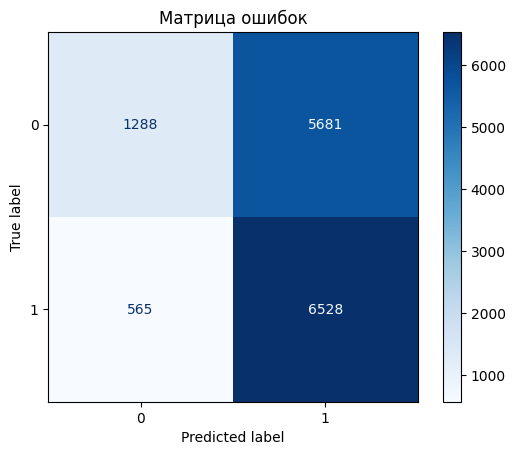

In [106]:
# Отобразим confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Матрица ошибок")
plt.show()

- True Positives (TP) = 6528 — модель правильно нашла 6528 виновников.
- False Positives (FP) = 5681 — модель ошибочно сочла невиновных виновными.
- False Negatives (FN) = 565 — пропущенные виновники.
- True Negatives (TN) = 1288 — правильно распознанные невиновные.

Модель отлично решает главную задачу — не пропустить виновника ДТП.
Даёт много ложных срабатываний (FP) что допустимо, если безопасность важнее.

In [116]:
# Посчитаем мертики полноты и точности явно

precision_avrg = precision_score(y_test, y_pred_opt, average='macro')
recall_avrg = recall_score(y_test, y_pred_opt, average='macro')

print(f"Precision: {precision_avrg:.3f}")
print(f"Recall:    {recall_avrg:.3f}")

Precision: 0.615
Recall:    0.553


Если использовать средние полноту и точность по обоим классам, а не только по классу 1.
Получим довольно плохие метрики, это связано с тем, что модель часто определяет невиновных виновными, однако думаю это допустимо т.к. нам нужно прежде всего выявить виновных водителей и предотвратить ДТП.

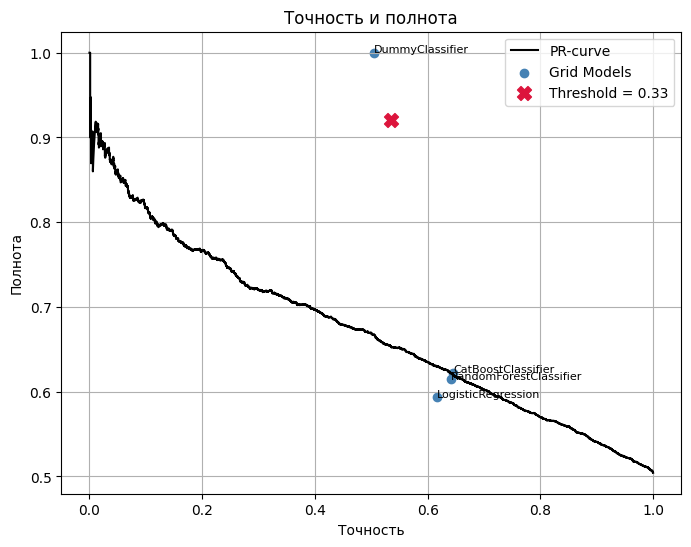

In [117]:
# Выведем точность и полноту на график

plt.figure(figsize=(8, 6))

plt.plot(recall, precision, color='black', label='PR-curve')

plt.scatter(best_metrics['mean_test_precision1'], best_metrics['mean_test_recall1'], color='steelblue', label='Grid Models')
for i, row in best_metrics.iterrows():
    plt.text(row['mean_test_precision1'], row['mean_test_recall1'], row['model'], fontsize=8)

plt.scatter(precision[best_idx], recall[best_idx], color='crimson', marker='X', s=100, label=f'Threshold = {best_threshold:.2f}')

plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.title('Точность и полнота')
plt.legend()
plt.grid(True)
plt.show()

### 6.2. Проанализируйте важность основных факторов, влияющих на вероятность ДТП.

In [109]:
# Извлечем лучшую модель

catboost_model = grid_search.best_estimator_.named_steps['classifier']
preprocessor = grid_search.best_estimator_.named_steps['preprocessor']

In [110]:
# Преобразуем X_test

X_test_transformed = preprocessor.transform(X_test)

In [111]:
# Получим имена признаков

feature_names = []

for name, transformer, cols in preprocessor.transformers_:
    if transformer == 'drop':
        continue
    elif transformer == 'passthrough':
        feature_names.extend(cols)
    else:
        if hasattr(transformer, 'named_steps'):
            transformer = transformer.named_steps[list(transformer.named_steps)[-1]]

        try:
            names = transformer.get_feature_names_out(cols)
        except:
            names = [f"{name}__{col}" for col in cols]

        feature_names.extend(names)

In [112]:
# Создим SHAP explainer и рассчитаем значения

explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test_transformed)

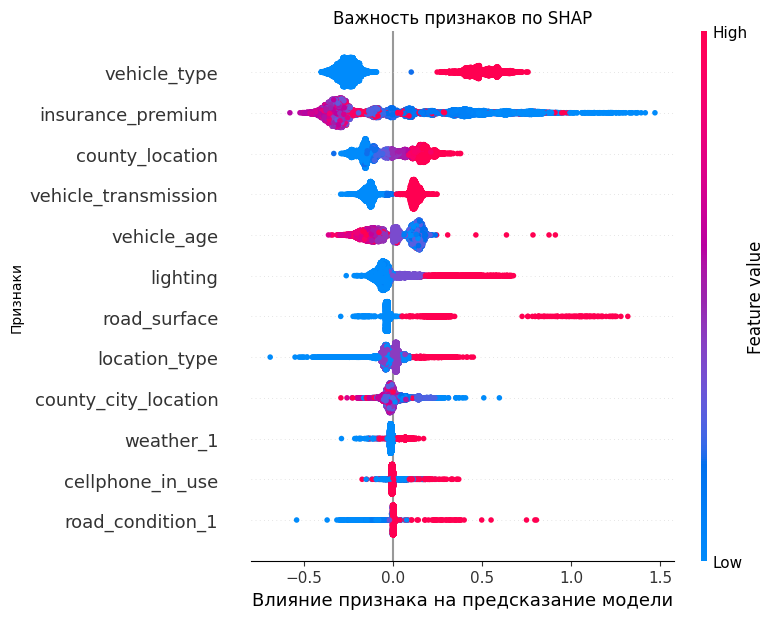

In [113]:
# Построим SHAP summary plot

shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, show=False)

plt.title('Важность признаков по SHAP')
plt.xlabel('Влияние признака на предсказание модели')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()

Важность признаков:

- vehicle_type - Владельцы минивенов реже бывают виновниками ДТП чем например владельцы купе
- insurance_premium - Чем меньше страховка тем больше вероятность вины в ДТП
- vehicle_age - Старые авто влияют на вероятность быть виновным в ДТП
- vehicle_transmission - С автоматической коробкой передач меньше шанс стать виновником ДТП, видимо потому что не приходится отвлекаться на лишние действия
- county_location - в каких то местах ДТП проиходят чаще, если маршрут водителя проходит по этим локациям есть шанс стать виновником ДТП как и наоборов в тех локациях где ДТП происходят реже
- lighting - чем лучше освещение тем меньше шанс ДТП
- county_city_location - то же самое что и county_location
- road_surface - на хорошем дорожном покрытии шанс стать виновником ДТП меньше
- location_type - на хайвейях шанс стать виновником ДТП меньше чем например на рампах
- weather - плохая погода может стать причиной ДТП
- cellphone_in_use - использование телефона может отвлечь и водитель может стать виновником ДТП
- road_condition - тоже самое что и road_surface

### 6.3. Для одного из выявленных важных факторов проведите дополнительное исследование:
- Покажите график зависимости фактора и целевой переменной.
- Предложите, чем можно оборудовать автомобиль, чтобы учесть этот фактор во время посадки водителя.

Пример решения задачи 3:
Выявили, что самый важный фактор ДТП — уровень трезвости виновника party_sobriety. Из таблицы исходных данных известно: есть несколько уровней трезвости. Тогда решение по пунктам выглядит так:
- Для графического анализа будем использовать столбчатую диаграмму. В ней отразим зависимость числа ДТП от уровня трезвости. Проанализируем график, сделаем выводы.
- Предложить оборудовать автомобиль анализатором алкогольного опьянения. Измерение состояния при посадке сделать обязательным условием допуска за руль. А чтобы убедиться, что в трубку дышит именно водитель, добавить камеру, направленную на водительское место.

In [114]:
# Агрегируем целевую переменную по vehicle_type'

agg = df_final.groupby('vehicle_type')['at_fault'].mean().reset_index()

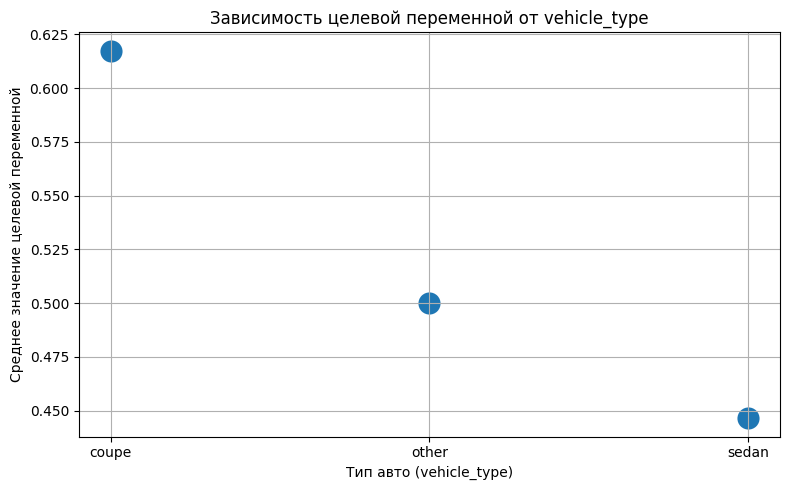

In [115]:
# Нарисуем график зависимости целевой переменной от vehicle_type

plt.figure(figsize=(8, 5))
sns.scatterplot(data=agg, x='vehicle_type', y='at_fault', s=300)
plt.title('Зависимость целевой переменной от vehicle_type')
plt.xlabel('Тип авто (vehicle_type)')
plt.ylabel('Среднее значение целевой переменной')
plt.grid(True)
plt.tight_layout()
plt.show()

Владельцы купе чаще признаются виновными по сравнению с владельцами седанов.

Для снижения числа потенциальных виновник ДТП можно устанавливать на купе ограничители скорости, сделать штрафы за нарушения правил для владельцев авто такого типа кузова более высокими, добавить какие-нибудь предупреждающие сигналы в систему мультимедия или навигации, давать возможность покупать купе только водителям с большим стажем вождения и возрастным ограничением.

## 7. Сделайте общий вывод по модели

- Кратко опишите лучшую модель.
- Сделайте вывод: насколько возможно создание адекватной системы оценки риска при выдаче авто?
- Какие факторы ещё необходимо собирать, чтобы улучшить модель?

Лучшей моделью стала CatBoostClassifier

- recall класса 1: 0.92 - модель находит 92% всех виновных, что отлично соответствует задаче
- precision класса 1: 0.535 — 53% случаев реальны
- recall класса 0: 0.185 — модель очень часто ошибается и переоценивает виновность, но это приемлемо, т.к. наш приоритет — не пропустить опасного водителя
- precision класса 0: 0.695 - модель в 69,5% случаев определяет невиновных верно

CatBoostClassifier показал себя лучшей моделью - он выявляет 92% виновных водителей (recall 1), при этом 53% таких предсказаний оказываются верными (precision 1).
Ошибки в сторону признания невиновных виновными можно допустить: невиновных модель находит с точностью 69.5%, хотя и пропускает часть из них (recall 0 = 18.5%).

Модель хорошо решает приоритетную задачу — не упустить потенциально опасного водителя.

Думаю наша модель снижает вероятность ДТП за счёт раннего выявления рискованных водителей, и может быть встроена в процессы допуска к поездке.

Факторы которые необходимо собрать чтобы улучшить модель:
    
- Мощность авто - мощные авто провоцируют водителей нарушать правила
- Стаж вождения водителя - более опытные водители реже попадают в ДТП
- История нарушений правил - те кто чаще нарушают чаще становятся виновниками ДТП
- Возраст водителя - с возрастом реакция ухудшается и может влиять на вероятность ДТП
- Частота использования авто - те кто используют авто редко теряют навыки и вероятность попасть в ДТП увеличивается
- Состояние авто - как часто авто проходит техническое обслуживание, даже новое авто может быть в очень плохом состоянии что может привести к ДТП
- История поездок - есть места где ДТП происходит чаще, если водитель постоянно проезжает эти места - риск ДТП возрастает